In [4]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import sys
sys.path.append('../')

In [9]:
from src.environments import centipede_v1
import supersuit as ss
from pettingzoo.utils.conversions import to_parallel

In [10]:
from stable_baselines3.common.monitor import Monitor


In [52]:
env = centipede_v1.env(prob=False)
#env = rpsls_v1.env()


#env = ss.agent_indicator_v0(env)


Centipede! 100
{'player_0': Discrete(3), 'player_1': Discrete(3)}


In [53]:
from pettingzoo.utils import random_demo
random_demo(env)


Current moves of: player_0 , NONE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , NONE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , NONE
Current moves of: player_1 , DEFECT
rewards {'player_0': 2.5, 'player_1': 4.5}

Current moves of: player_1 , DEFECT
rewards {'player_1': 0}

Average total reward 7.0


7.0

In [68]:
env = centipede_v1.env(prob=False)

env = to_parallel(env)

env = ss.pettingzoo_env_to_vec_env_v0(env)
env = ss.concat_vec_envs_v0(env, 1, base_class='stable_baselines3')



Centipede! 100
{'player_0': Discrete(3), 'player_1': Discrete(3)}


In [69]:
from stable_baselines3.common.callbacks import BaseCallback      
from pprint import pprint      
        
class TensorboardCallback(BaseCallback):
    """
    Custom callback for plotting additional values in tensorboard.
    """

    def __init__(self, verbose=0):
        super(TensorboardCallback, self).__init__(verbose)
        self.value=0

    def _on_step(self) -> bool:
        # Log scalar value (here a random variable)
        #pprint(self.locals)
#         self.value = sum(self.locals["rewards"])
#         self.logger.record('reward', self.value)
        
        if (self.num_timesteps % 10 == 0):
            self.logger.dump(self.num_timesteps)
            self.value = sum(self.locals["rewards"])
            
            if self.value != 0:
                self.logger.record('reward', self.value)
        
        return True
        
reward_logger = TensorboardCallback()


In [70]:
from stable_baselines3 import PPO, A2C, DQN

model = A2C('MlpPolicy', 
            env, 
            verbose=5,
            tensorboard_log='tmp/',
            )
model.learn(total_timesteps=2000000,callback=TensorboardCallback())
model.save("policy")

Using cpu device
Logging to tmp/A2C_6
------------------------------------
| reward                | 1        |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1        |
|    policy_loss        | 0.81     |
|    value_loss         | 3.6      |
------------------------------------
------------------------------------
| reward                | 3        |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2        |
|    policy_loss        | 0.888    |
|    value_loss         | 3.79     |
------------------------------------
------------------------------------
| reward                | 1        |
| train/                |          |
|    entropy_loss       | -0.681   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |


------------------------------------
| train/                |          |
|    entropy_loss       | -0.341   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 25       |
|    policy_loss        | -0.0116  |
|    value_loss         | 0.0127   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.361   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 26       |
|    policy_loss        | 6.24     |
|    value_loss         | 475      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.371   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 27       |
|    policy_loss        | -1.04    |
|    value_loss         | 1.37     |
------------------------------------
-

------------------------------------
| reward                | 5        |
| train/                |          |
|    entropy_loss       | -0.421   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 49       |
|    policy_loss        | -1.16    |
|    value_loss         | 5.02     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.333   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 50       |
|    policy_loss        | 1.02     |
|    value_loss         | 13.6     |
------------------------------------
------------------------------------
| reward                | 7        |
| train/                |          |
|    entropy_loss       | -0.333   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 51       |
|    policy_loss        | -0.879   |
|

------------------------------------
| train/                |          |
|    entropy_loss       | -0.297   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 74       |
|    policy_loss        | -0.00986 |
|    value_loss         | 0.0141   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.305   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 75       |
|    policy_loss        | 5.66     |
|    value_loss         | 192      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.32    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 76       |
|    policy_loss        | -0.737   |
|    value_loss         | 8.46     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.408   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.0148  |
|    value_loss         | 0.0115   |
------------------------------------
-----------------------------
| time/              |      |
|    fps             | 579  |
|    iterations      | 100  |
|    time_elapsed    | 1    |
|    total_timesteps | 1000 |
-----------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.42    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 100      |
|    policy_loss        | -0.0151  |
|    value_loss         | 0.0107   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.433   |
|    explaine

------------------------------------
| reward                | 29       |
| train/                |          |
|    entropy_loss       | -0.368   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 123      |
|    policy_loss        | 3.57     |
|    value_loss         | 161      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.365   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 124      |
|    policy_loss        | -0.0136  |
|    value_loss         | 0.0141   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.375   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 125      |
|    policy_loss        | 1.08     |
|    value_loss         | 28.4     |
-

------------------------------------
| reward                | 13       |
| train/                |          |
|    entropy_loss       | -0.327   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 147      |
|    policy_loss        | 1.78     |
|    value_loss         | 33.6     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.33     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 148       |
|    policy_loss        | -0.0287   |
|    value_loss         | 8.56      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.319   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 149      |
|    policy_loss        | 1.8      |
|    value_loss         | 59.

------------------------------------
| train/                |          |
|    entropy_loss       | -0.256   |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 171      |
|    policy_loss        | -0.0099  |
|    value_loss         | 0.022    |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.261    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 172       |
|    policy_loss        | 6.04      |
|    value_loss         | 260       |
-------------------------------------
------------------------------------
| reward                | 27       |
| train/                |          |
|    entropy_loss       | -0.267   |
|    explained_variance | 4.17e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 173      |
|    policy_loss        | 2.68     |
|    value_loss         | 76.

------------------------------------
| train/                |          |
|    entropy_loss       | -0.22    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 196      |
|    policy_loss        | -0.00874 |
|    value_loss         | 0.0264   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.224   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 197      |
|    policy_loss        | 2.01     |
|    value_loss         | 66.4     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.229   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 198      |
|    policy_loss        | 0.238    |
|    value_loss         | 10.5     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.205   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 220      |
|    policy_loss        | -0.00752 |
|    value_loss         | 0.0239   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.208   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 221      |
|    policy_loss        | -0.00752 |
|    value_loss         | 0.0229   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.212   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 222      |
|    policy_loss        | -0.00752 |
|    value_loss         | 0.0219   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.272   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 245      |
|    policy_loss        | -0.00823 |
|    value_loss         | 0.0128   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.277   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 246      |
|    policy_loss        | 5.68     |
|    value_loss         | 238      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.283   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 247      |
|    policy_loss        | -0.00875 |
|    value_loss         | 0.0128   |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.25     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 269       |
|    policy_loss        | -0.00805  |
|    value_loss         | 0.0156    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.254   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 270      |
|    policy_loss        | 4.4      |
|    value_loss         | 276      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.257   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 271      |
|    policy_loss        | 1.53     |
|    value_loss         | 25.3     |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.286   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 294      |
|    policy_loss        | 2.56     |
|    value_loss         | 62.2     |
------------------------------------
------------------------------------
| reward                | 1        |
| train/                |          |
|    entropy_loss       | -0.293   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 295      |
|    policy_loss        | 1.23     |
|    value_loss         | 63.7     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.29    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 296      |
|    policy_loss        | -0.0124  |
|    value_loss         | 0.0239   |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.352   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 318      |
|    policy_loss        | 0.588    |
|    value_loss         | 58.2     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.345   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 319      |
|    policy_loss        | -0.0157  |
|    value_loss         | 0.0225   |
------------------------------------
------------------------------------
| reward                | 13       |
| train/                |          |
|    entropy_loss       | -0.352   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 320      |
|    policy_loss        | 2.47     |
|    value_loss         | 37.9     |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.328   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 343      |
|    policy_loss        | -0.0152  |
|    value_loss         | 0.0245   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.334    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 344       |
|    policy_loss        | 1.2       |
|    value_loss         | 15        |
-------------------------------------
------------------------------------
| reward                | 5        |
| train/                |          |
|    entropy_loss       | -0.348   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 345      |
|    policy_loss        | 1.53     |
|    value_loss         | 100

------------------------------------
| reward                | 15       |
| train/                |          |
|    entropy_loss       | -0.341   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 367      |
|    policy_loss        | -0.419   |
|    value_loss         | 8.37     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.323   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 368      |
|    policy_loss        | 0.442    |
|    value_loss         | 20.9     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.318    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 369       |
|    policy_loss        | -0.0152   |
|    value_loss         | 0.027

------------------------------------
| train/                |          |
|    entropy_loss       | -0.318   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 391      |
|    policy_loss        | 1.84     |
|    value_loss         | 36       |
------------------------------------
------------------------------------
| reward                | 5        |
| train/                |          |
|    entropy_loss       | -0.319   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 392      |
|    policy_loss        | -1.16    |
|    value_loss         | 16.3     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.273   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 393      |
|    policy_loss        | -0.0116  |
|    value_loss         | 0.025    |
-

------------------------------------
| reward                | 61       |
| train/                |          |
|    entropy_loss       | -0.295   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 415      |
|    policy_loss        | 8.51     |
|    value_loss         | 781      |
------------------------------------
------------------------------------
| reward                | 19       |
| train/                |          |
|    entropy_loss       | -0.295   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 416      |
|    policy_loss        | 1.48     |
|    value_loss         | 27.4     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.295   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 417      |
|    policy_loss        | -0.0115  |
|

------------------------------------
| train/                |          |
|    entropy_loss       | -0.301   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 439      |
|    policy_loss        | -0.0123  |
|    value_loss         | 0.021    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.308   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 440      |
|    policy_loss        | 2.21     |
|    value_loss         | 33.5     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.318   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 441      |
|    policy_loss        | 1.11     |
|    value_loss         | 10.5     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.344   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 464      |
|    policy_loss        | 3.58     |
|    value_loss         | 162      |
------------------------------------
-------------------------------------
| reward                | 9         |
| train/                |           |
|    entropy_loss       | -0.344    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 465       |
|    policy_loss        | 1.05      |
|    value_loss         | 9.69      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.355   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 466      |
|    policy_loss        | -0.017   |
|    value_loss         | 0.

------------------------------------
| train/                |          |
|    entropy_loss       | -0.212   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 489      |
|    policy_loss        | 22.6     |
|    value_loss         | 580      |
------------------------------------
------------------------------------
| reward                | 31       |
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 490      |
|    policy_loss        | 3.36     |
|    value_loss         | 113      |
------------------------------------
------------------------------------
| reward                | 17       |
| train/                |          |
|    entropy_loss       | -0.238   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 491      |
|    policy_loss        | 1.14     |
|

------------------------------------
| train/                |          |
|    entropy_loss       | -0.242   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 513      |
|    policy_loss        | -0.00893 |
|    value_loss         | 0.021    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.246   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 514      |
|    policy_loss        | -0.00896 |
|    value_loss         | 0.0202   |
------------------------------------
------------------------------------
| reward                | 79       |
| train/                |          |
|    entropy_loss       | -0.251   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 515      |
|    policy_loss        | 11.4     |
|    value_loss         | 1.19e+03 |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.356   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 538      |
|    policy_loss        | 5.96     |
|    value_loss         | 146      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.38    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 539      |
|    policy_loss        | 2.23     |
|    value_loss         | 46.7     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.381    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 540       |
|    policy_loss        | 1.12      |
|    value_loss         | 13.9      |
------------------------------

------------------------------------
| reward                | 9        |
| train/                |          |
|    entropy_loss       | -0.326   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 563      |
|    policy_loss        | 0.634    |
|    value_loss         | 52.7     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.32     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 564       |
|    policy_loss        | -0.0159   |
|    value_loss         | 0.0291    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.327   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 565      |
|    policy_loss        | -0.0161  |
|    value_loss         | 0.0

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.265    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 588       |
|    policy_loss        | 0.469     |
|    value_loss         | 4.69      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.265    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 589       |
|    policy_loss        | -0.0121   |
|    value_loss         | 0.0296    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.269   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 590      |
|    policy_loss        | 4.21     |
|    value_loss         | 158      |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.247   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 612      |
|    policy_loss        | 2.44     |
|    value_loss         | 30.9     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.265   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 613      |
|    policy_loss        | -0.0112  |
|    value_loss         | 0.0255   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.27     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 614       |
|    policy_loss        | -0.0113   |
|    value_loss         | 0.0245    |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.296   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 637      |
|    policy_loss        | 1.77     |
|    value_loss         | 49       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.301   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 638      |
|    policy_loss        | -2.84    |
|    value_loss         | 6.38     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.267   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 639      |
|    policy_loss        | 1.16     |
|    value_loss         | 16.2     |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.244    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 662       |
|    policy_loss        | -0.936    |
|    value_loss         | 1.35      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.216   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 663      |
|    policy_loss        | -0.00651 |
|    value_loss         | 0.0155   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.219   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 664      |
|    policy_loss        | 5.7      |
|    value_loss         | 253      |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.339   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 687      |
|    policy_loss        | -0.0109  |
|    value_loss         | 0.0113   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.347   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 688      |
|    policy_loss        | -0.0109  |
|    value_loss         | 0.0107   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.354   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 689      |
|    policy_loss        | 7.95     |
|    value_loss         | 273      |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.371   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 711      |
|    policy_loss        | -0.0137  |
|    value_loss         | 0.0135   |
------------------------------------
------------------------------------
| reward                | 87       |
| train/                |          |
|    entropy_loss       | -0.379   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 712      |
|    policy_loss        | 12.8     |
|    value_loss         | 1.54e+03 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.377   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 713      |
|    policy_loss        | 0.866    |
|    value_loss         | 22.5     |
-

------------------------------------
| reward                | 47       |
| train/                |          |
|    entropy_loss       | -0.353   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 736      |
|    policy_loss        | 6.14     |
|    value_loss         | 368      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.352   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 737      |
|    policy_loss        | -0.014   |
|    value_loss         | 0.0167   |
------------------------------------
------------------------------------
| reward                | 37       |
| train/                |          |
|    entropy_loss       | -0.359   |
|    explained_variance | 3.58e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 738      |
|    policy_loss        | 4.76     |
|

------------------------------------
| train/                |          |
|    entropy_loss       | -0.266   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 760      |
|    policy_loss        | -0.00879 |
|    value_loss         | 0.0155   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.271    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 761       |
|    policy_loss        | -0.00881  |
|    value_loss         | 0.0148    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.276   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 762      |
|    policy_loss        | 9.63     |
|    value_loss         | 655      |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.3      |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 784       |
|    policy_loss        | -0.0113   |
|    value_loss         | 0.0179    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.306   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 785      |
|    policy_loss        | 5.56     |
|    value_loss         | 330      |
------------------------------------
-------------------------------------
| reward                | 23        |
| train/                |           |
|    entropy_loss       | -0.307    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 786       |
|    policy_loss        | 2.16      |
|    value_loss      

-------------------------------------
| reward                | 5         |
| train/                |           |
|    entropy_loss       | -0.261    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 808       |
|    policy_loss        | 2.18      |
|    value_loss         | 131       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.261   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 809      |
|    policy_loss        | -0.0102  |
|    value_loss         | 0.0221   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.265   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 810      |
|    policy_loss        | 2.08     |
|    value_loss         | 44

------------------------------------
| reward                | 13       |
| train/                |          |
|    entropy_loss       | -0.275   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 832      |
|    policy_loss        | -0.813   |
|    value_loss         | 23.9     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.261    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 833       |
|    policy_loss        | -0.0115   |
|    value_loss         | 0.028     |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.265   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 834      |
|    policy_loss        | 1.45     |
|    value_loss         | 30 

------------------------------------
| train/                |          |
|    entropy_loss       | -0.279   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 857      |
|    policy_loss        | -0.212   |
|    value_loss         | 0.409    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.231   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 858      |
|    policy_loss        | 0.336    |
|    value_loss         | 1.15     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.246    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 859       |
|    policy_loss        | -0.0112   |
|    value_loss         | 0.0315    |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.309   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 881      |
|    policy_loss        | 0.87     |
|    value_loss         | 71.6     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.315   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 882      |
|    policy_loss        | -0.0153  |
|    value_loss         | 0.0285   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.321   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 883      |
|    policy_loss        | -0.0155  |
|    value_loss         | 0.0275   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.28    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 905      |
|    policy_loss        | -0.0125  |
|    value_loss         | 0.027    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.285   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 906      |
|    policy_loss        | -0.0126  |
|    value_loss         | 0.026    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.29    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 907      |
|    policy_loss        | -0.0127  |
|    value_loss         | 0.0251   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.308   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 930      |
|    policy_loss        | 0.294    |
|    value_loss         | 10.6     |
------------------------------------
------------------------------------
| reward                | 7        |
| train/                |          |
|    entropy_loss       | -0.304   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 931      |
|    policy_loss        | 0.81     |
|    value_loss         | 30.8     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.303   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 932      |
|    policy_loss        | -2.11    |
|    value_loss         | 13.1     |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.303   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 954      |
|    policy_loss        | -0.0123  |
|    value_loss         | 0.0208   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.309   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 955      |
|    policy_loss        | -0.576   |
|    value_loss         | 28.6     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.289   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 956      |
|    policy_loss        | -0.0115  |
|    value_loss         | 0.0208   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.358   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 979      |
|    policy_loss        | -0.0177  |
|    value_loss         | 0.0252   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.365   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 980      |
|    policy_loss        | 2.21     |
|    value_loss         | 23.2     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.387    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 981       |
|    policy_loss        | -0.0201   |
|    value_loss         | 0.0251    |
------------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.326    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1003      |
|    policy_loss        | -0.016    |
|    value_loss         | 0.028     |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.332   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1004     |
|    policy_loss        | 11.4     |
|    value_loss         | 380      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.342   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1005     |
|    policy_loss        | -0.267   |
|    value_loss         | 6.05     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.279    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1027      |
|    policy_loss        | 1.36      |
|    value_loss         | 13.6      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.287    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1028      |
|    policy_loss        | -0.015    |
|    value_loss         | 0.0358    |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.292    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1029      |
|    policy_loss        | 4.34      |
|    value_loss         | 146       |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.213   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1052     |
|    policy_loss        | -0.00969 |
|    value_loss         | 0.0358   |
------------------------------------
------------------------------------
| reward                | 73       |
| train/                |          |
|    entropy_loss       | -0.216   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1053     |
|    policy_loss        | 10.3     |
|    value_loss         | 1.09e+03 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.218   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1054     |
|    policy_loss        | -1.22    |
|    value_loss         | 5.79     |
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.171    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1077      |
|    policy_loss        | -0.0063   |
|    value_loss         | 0.0275    |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.173    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1078      |
|    policy_loss        | -0.00629  |
|    value_loss         | 0.0265    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.176   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1079     |
|    policy_loss        | 6.17     |
|    value_loss         | 124      |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.282    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1101      |
|    policy_loss        | -0.0113   |
|    value_loss         | 0.0216    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.287   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1102     |
|    policy_loss        | -0.0114  |
|    value_loss         | 0.0208   |
------------------------------------
------------------------------------
| reward                | 7        |
| train/                |          |
|    entropy_loss       | -0.293   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1103     |
|    policy_loss        | 5.44     |
|    value_loss         | 264

------------------------------------
| train/                |          |
|    entropy_loss       | -0.356   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1126     |
|    policy_loss        | 3.24     |
|    value_loss         | 123      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.357   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1127     |
|    policy_loss        | -0.0171  |
|    value_loss         | 0.0237   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.365   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1128     |
|    policy_loss        | 4.85     |
|    value_loss         | 220      |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.329   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1150     |
|    policy_loss        | -0.388   |
|    value_loss         | 3.12     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.289   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1151     |
|    policy_loss        | -0.0142  |
|    value_loss         | 0.0318   |
------------------------------------
------------------------------------
| reward                | 55       |
| train/                |          |
|    entropy_loss       | -0.294   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1152     |
|    policy_loss        | 6.93     |
|    value_loss         | 467      |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.217   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1174     |
|    policy_loss        | 4.35     |
|    value_loss         | 155      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.221   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1175     |
|    policy_loss        | 0.845    |
|    value_loss         | 35.2     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.22    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1176     |
|    policy_loss        | 0.818    |
|    value_loss         | 35       |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.256    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1198      |
|    policy_loss        | -0.011    |
|    value_loss         | 0.027     |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.261    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1199      |
|    policy_loss        | 4.74      |
|    value_loss         | 69.1      |
-------------------------------------
------------------------------
| time/              |       |
|    fps             | 567   |
|    iterations      | 1200  |
|    time_elapsed    | 21    |
|    total_timesteps | 12000 |
------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss      

------------------------------------
| train/                |          |
|    entropy_loss       | -0.164   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1222     |
|    policy_loss        | -0.00561 |
|    value_loss         | 0.0245   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.166   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1223     |
|    policy_loss        | -0.00559 |
|    value_loss         | 0.0236   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.168   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1224     |
|    policy_loss        | -0.00557 |
|    value_loss         | 0.0226   |
------------------------------------
-

-------------------------------------
| reward                | 11        |
| train/                |           |
|    entropy_loss       | -0.284    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1247      |
|    policy_loss        | 3.15      |
|    value_loss         | 55.1      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.293   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1248     |
|    policy_loss        | 0.184    |
|    value_loss         | 1.79     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.291   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1249     |
|    policy_loss        | -0.0108  |
|    value_loss         | 0.

------------------------------------
| train/                |          |
|    entropy_loss       | -0.336   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1271     |
|    policy_loss        | -0.0857  |
|    value_loss         | 39.5     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.325   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1272     |
|    policy_loss        | 0.416    |
|    value_loss         | 15.9     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.32    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1273     |
|    policy_loss        | -0.0147  |
|    value_loss         | 0.0248   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.271   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1295     |
|    policy_loss        | -0.133   |
|    value_loss         | 0.666    |
------------------------------------
------------------------------------
| reward                | 3        |
| train/                |          |
|    entropy_loss       | -0.249   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1296     |
|    policy_loss        | 1.95     |
|    value_loss         | 27.6     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.256   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1297     |
|    policy_loss        | -0.0114  |
|    value_loss         | 0.0296   |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.346   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1319     |
|    policy_loss        | -0.0163  |
|    value_loss         | 0.024    |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.353    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1320      |
|    policy_loss        | 3.88      |
|    value_loss         | 147       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.36    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1321     |
|    policy_loss        | 1.22     |
|    value_loss         | 17.8     |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.318   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1343     |
|    policy_loss        | -0.0148  |
|    value_loss         | 0.0259   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.325   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1344     |
|    policy_loss        | -0.0151  |
|    value_loss         | 0.025    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.332   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1345     |
|    policy_loss        | -0.0153  |
|    value_loss         | 0.0241   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.385   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1367     |
|    policy_loss        | 7.32     |
|    value_loss         | 370      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.394   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1368     |
|    policy_loss        | 0.189    |
|    value_loss         | 5.3      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.389   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1369     |
|    policy_loss        | 2.92     |
|    value_loss         | 83.6     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.356   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1391     |
|    policy_loss        | -0.0196  |
|    value_loss         | 0.0317   |
------------------------------------
------------------------------------
| reward                | 57       |
| train/                |          |
|    entropy_loss       | -0.364   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1392     |
|    policy_loss        | 7.62     |
|    value_loss         | 647      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.362   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1393     |
|    policy_loss        | -1.11    |
|    value_loss         | 3.34     |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.295   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1415     |
|    policy_loss        | -0.255   |
|    value_loss         | 0.599    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.251   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1416     |
|    policy_loss        | -0.0116  |
|    value_loss         | 0.0321   |
------------------------------------
------------------------------------
| reward                | 45       |
| train/                |          |
|    entropy_loss       | -0.255   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1417     |
|    policy_loss        | 5.56     |
|    value_loss         | 385      |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.221   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1439     |
|    policy_loss        | -0.00939 |
|    value_loss         | 0.0302   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.225   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1440     |
|    policy_loss        | 3.35     |
|    value_loss         | 57       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.248   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1441     |
|    policy_loss        | 0.148    |
|    value_loss         | 10.5     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.28    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1464     |
|    policy_loss        | -0.0126  |
|    value_loss         | 0.0274   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.286   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1465     |
|    policy_loss        | -0.0128  |
|    value_loss         | 0.0264   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.292    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1466      |
|    policy_loss        | -0.0129   |
|    value_loss         | 0.0255    |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.262   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1489     |
|    policy_loss        | -1.18    |
|    value_loss         | 2.56     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.235   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1490     |
|    policy_loss        | 0.787    |
|    value_loss         | 9.3      |
------------------------------------
------------------------------------
| reward                | 11       |
| train/                |          |
|    entropy_loss       | -0.246   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1491     |
|    policy_loss        | 1.32     |
|    value_loss         | 28.4     |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.279   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1513     |
|    policy_loss        | -0.0921  |
|    value_loss         | 0.73     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.262   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1514     |
|    policy_loss        | -0.373   |
|    value_loss         | 3.01     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.228   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1515     |
|    policy_loss        | -0.00947 |
|    value_loss         | 0.028    |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.32    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1537     |
|    policy_loss        | 3.33     |
|    value_loss         | 180      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.323   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1538     |
|    policy_loss        | -0.385   |
|    value_loss         | 27.4     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.308   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1539     |
|    policy_loss        | -0.0143  |
|    value_loss         | 0.0265   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.312   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1562     |
|    policy_loss        | -0.0139  |
|    value_loss         | 0.0243   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.318   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1563     |
|    policy_loss        | -0.0141  |
|    value_loss         | 0.0234   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.325   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1564     |
|    policy_loss        | -0.0143  |
|    value_loss         | 0.0225   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.375   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1586     |
|    policy_loss        | 0.762    |
|    value_loss         | 9.6      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.385   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1587     |
|    policy_loss        | -0.0183  |
|    value_loss         | 0.0213   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.394   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1588     |
|    policy_loss        | 5.01     |
|    value_loss         | 215      |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.226   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1610     |
|    policy_loss        | -0.00845 |
|    value_loss         | 0.023    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.23    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1611     |
|    policy_loss        | 10.9     |
|    value_loss         | 304      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.255   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1612     |
|    policy_loss        | -0.01    |
|    value_loss         | 0.0229   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.292   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1635     |
|    policy_loss        | -0.0113  |
|    value_loss         | 0.0194   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.298    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1636      |
|    policy_loss        | -0.0114   |
|    value_loss         | 0.0186    |
-------------------------------------
-------------------------------------
| reward                | 69        |
| train/                |           |
|    entropy_loss       | -0.305    |
|    explained_variance | -4.77e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1637      |
|    policy_loss        | 9.79      |
|    value_loss      

------------------------------------
| train/                |          |
|    entropy_loss       | -0.278   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1659     |
|    policy_loss        | 11.9     |
|    value_loss         | 1.2e+03  |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.281    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1660      |
|    policy_loss        | -0.0106   |
|    value_loss         | 0.0193    |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.287    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1661      |
|    policy_loss        | 4.32      |
|    value_loss         | 214       |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.338    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1684      |
|    policy_loss        | -0.944    |
|    value_loss         | 2.09      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.311    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1685      |
|    policy_loss        | 1.63      |
|    value_loss         | 19.8      |
-------------------------------------
------------------------------------
| reward                | 31       |
| train/                |          |
|    entropy_loss       | -0.32    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1686     |
|    policy_loss        | 3.3      |
|    value_loss     

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.233    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1708      |
|    policy_loss        | -0.00901  |
|    value_loss         | 0.024     |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1709     |
|    policy_loss        | 8.98     |
|    value_loss         | 643      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.24    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1710     |
|    policy_loss        | -0.00941 |
|    value_loss         | 0.024    |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.219   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1732     |
|    policy_loss        | 7.51     |
|    value_loss         | 529      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.222   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1733     |
|    policy_loss        | 0.471    |
|    value_loss         | 3.83     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.224   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1734     |
|    policy_loss        | -0.453   |
|    value_loss         | 3.05     |
------------------------------------
-

------------------------------------
| reward                | 11       |
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1756     |
|    policy_loss        | -2.87    |
|    value_loss         | 6.44     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.199    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1757      |
|    policy_loss        | -0.00754  |
|    value_loss         | 0.026     |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.202   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1758     |
|    policy_loss        | -0.00755 |
|    value_loss         | 0.0

------------------------------------
| train/                |          |
|    entropy_loss       | -0.255   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1780     |
|    policy_loss        | -0.0106  |
|    value_loss         | 0.0253   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.26    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1781     |
|    policy_loss        | -0.0106  |
|    value_loss         | 0.0244   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.264   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1782     |
|    policy_loss        | -0.0107  |
|    value_loss         | 0.0235   |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.255    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1804      |
|    policy_loss        | 0.0521    |
|    value_loss         | 21.1      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.25    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1805     |
|    policy_loss        | -0.0099  |
|    value_loss         | 0.0236   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.254   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1806     |
|    policy_loss        | -0.00995 |
|    value_loss         | 0.0228   |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.279   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1829     |
|    policy_loss        | -0.0109  |
|    value_loss         | 0.0208   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.284   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1830     |
|    policy_loss        | 4.27     |
|    value_loss         | 212      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.285   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1831     |
|    policy_loss        | -0.0113  |
|    value_loss         | 0.0208   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.311   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1854     |
|    policy_loss        | -0.0133  |
|    value_loss         | 0.022    |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.318    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1855      |
|    policy_loss        | -0.0134   |
|    value_loss         | 0.0212    |
-------------------------------------
------------------------------------
| reward                | 57       |
| train/                |          |
|    entropy_loss       | -0.324   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1856     |
|    policy_loss        | 7.79     |
|    value_loss         | 669

------------------------------------
| train/                |          |
|    entropy_loss       | -0.232   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1879     |
|    policy_loss        | -0.00863 |
|    value_loss         | 0.0222   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1880     |
|    policy_loss        | 4.17     |
|    value_loss         | 89.5     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.247    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1881      |
|    policy_loss        | -0.00942  |
|    value_loss         | 0.0222    |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.291   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1903     |
|    policy_loss        | -0.0107  |
|    value_loss         | 0.0178   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.297   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1904     |
|    policy_loss        | 5.7      |
|    value_loss         | 111      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.323    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1905      |
|    policy_loss        | 4.04      |
|    value_loss         | 31.2      |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.4     |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1928     |
|    policy_loss        | -1.57    |
|    value_loss         | 3.99     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.371    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1929      |
|    policy_loss        | 1.76      |
|    value_loss         | 58.4      |
-------------------------------------
------------------------------------
| reward                | 15       |
| train/                |          |
|    entropy_loss       | -0.368   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1930     |
|    policy_loss        | -0.04    |
|    value_loss         | 9.6

------------------------------------
| train/                |          |
|    entropy_loss       | -0.231   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1953     |
|    policy_loss        | 4.67     |
|    value_loss         | 197      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.238   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1954     |
|    policy_loss        | 0.965    |
|    value_loss         | 9.86     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.242   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1955     |
|    policy_loss        | -1.37    |
|    value_loss         | 5.68     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.271   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1978     |
|    policy_loss        | -0.0115  |
|    value_loss         | 0.0252   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.276   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1979     |
|    policy_loss        | 18.9     |
|    value_loss         | 906      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.287   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1980     |
|    policy_loss        | -0.0125  |
|    value_loss         | 0.0252   |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.325    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2002      |
|    policy_loss        | -1.06     |
|    value_loss         | 3.01      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.273   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2003     |
|    policy_loss        | -0.0104  |
|    value_loss         | 0.0202   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.278   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2004     |
|    policy_loss        | 3.21     |
|    value_loss         | 35.2     |
-----------------------------

-------------------------------------
| reward                | 67        |
| train/                |           |
|    entropy_loss       | -0.264    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2027      |
|    policy_loss        | 9.21      |
|    value_loss         | 796       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.265   |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2028     |
|    policy_loss        | -0.0109  |
|    value_loss         | 0.0238   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.27    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2029     |
|    policy_loss        | -0.0109  |
|    value_loss         | 0.

------------------------------------
| train/                |          |
|    entropy_loss       | -0.189   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2052     |
|    policy_loss        | -0.376   |
|    value_loss         | 2.95     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.17    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2053     |
|    policy_loss        | 0.876    |
|    value_loss         | 9.28     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.179    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2054      |
|    policy_loss        | -0.00654  |
|    value_loss         | 0.0262    |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.272   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2077     |
|    policy_loss        | 4.08     |
|    value_loss         | 126      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.276   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2078     |
|    policy_loss        | -0.012   |
|    value_loss         | 0.0261   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.281   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2079     |
|    policy_loss        | -0.0121  |
|    value_loss         | 0.0252   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.292   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2101     |
|    policy_loss        | 3.52     |
|    value_loss         | 103      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.306    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2102      |
|    policy_loss        | 0.444     |
|    value_loss         | 2.9       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.31    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2103     |
|    policy_loss        | -0.0146  |
|    value_loss         | 0.0272   |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.268   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2125     |
|    policy_loss        | -0.0114  |
|    value_loss         | 0.0256   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.273   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2126     |
|    policy_loss        | 6.8      |
|    value_loss         | 398      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.276   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2127     |
|    policy_loss        | 0.337    |
|    value_loss         | 15.8     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.238   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2150     |
|    policy_loss        | -0.0104  |
|    value_loss         | 0.03     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.242    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2151      |
|    policy_loss        | 16.2      |
|    value_loss         | 180       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.282   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2152     |
|    policy_loss        | -0.0133  |
|    value_loss         | 0.0297   |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.354   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2175     |
|    policy_loss        | -0.0187  |
|    value_loss         | 0.0292   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.361    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2176      |
|    policy_loss        | 2.59      |
|    value_loss         | 30.7      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.382   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2177     |
|    policy_loss        | 0.556    |
|    value_loss         | 13.2     |
-----------------------------

---------------------------------
| reward             | 29       |
| time/              |          |
|    fps             | 550      |
|    iterations      | 2200     |
|    time_elapsed    | 39       |
|    total_timesteps | 22000    |
---------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.304   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2200     |
|    policy_loss        | 3.06     |
|    value_loss         | 147      |
------------------------------------
-------------------------------------
| reward                | 17        |
| train/                |           |
|    entropy_loss       | -0.303    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2201      |
|    policy_loss        | 1.1       |
|    value_loss         | 44.5      |
-------------------------------------
---------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.24    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2224     |
|    policy_loss        | 4.15     |
|    value_loss         | 122      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.246   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2225     |
|    policy_loss        | -2.72    |
|    value_loss         | 7.91     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.219   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2226     |
|    policy_loss        | -0.00886 |
|    value_loss         | 0.0276   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.274   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2249     |
|    policy_loss        | -0.0105  |
|    value_loss         | 0.0203   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.279   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2250     |
|    policy_loss        | -0.0105  |
|    value_loss         | 0.0195   |
------------------------------------
------------------------------------
| reward                | 7        |
| train/                |          |
|    entropy_loss       | -0.284   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2251     |
|    policy_loss        | 11.4     |
|    value_loss         | 1e+03    |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.299   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2273     |
|    policy_loss        | -0.0113  |
|    value_loss         | 0.0181   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.305   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2274     |
|    policy_loss        | -0.0114  |
|    value_loss         | 0.0174   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.311   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2275     |
|    policy_loss        | 12.4     |
|    value_loss         | 895      |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.299    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2298      |
|    policy_loss        | 0.461     |
|    value_loss         | 10.9      |
-------------------------------------
------------------------------------
| reward                | 29       |
| train/                |          |
|    entropy_loss       | -0.298   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2299     |
|    policy_loss        | 3.27     |
|    value_loss         | 154      |
------------------------------------
------------------------------
| time/              |       |
|    fps             | 550   |
|    iterations      | 2300  |
|    time_elapsed    | 41    |
|    total_timesteps | 23000 |
------------------------------
------------------------------------
| train/                |         

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.333    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2322      |
|    policy_loss        | 7.08      |
|    value_loss         | 114       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.353   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2323     |
|    policy_loss        | -0.382   |
|    value_loss         | 6.26     |
------------------------------------
------------------------------------
| reward                | 3        |
| train/                |          |
|    entropy_loss       | -0.333   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2324     |
|    policy_loss        | 0.478    |
|    value_loss         | 23.

------------------------------------
| train/                |          |
|    entropy_loss       | -0.373   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2347     |
|    policy_loss        | -0.339   |
|    value_loss         | 0.527    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.348   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2348     |
|    policy_loss        | -0.0138  |
|    value_loss         | 0.0168   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.355   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2349     |
|    policy_loss        | 5.56     |
|    value_loss         | 332      |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.287   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2372     |
|    policy_loss        | -0.00895 |
|    value_loss         | 0.0129   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.293   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2373     |
|    policy_loss        | -0.00899 |
|    value_loss         | 0.0122   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.298   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2374     |
|    policy_loss        | 17.6     |
|    value_loss         | 2.63e+03 |
------------------------------------
-

------------------------------------
| reward                | 3        |
| train/                |          |
|    entropy_loss       | -0.386   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2397     |
|    policy_loss        | -0.264   |
|    value_loss         | 10.2     |
------------------------------------
------------------------------------
| reward                | 19       |
| train/                |          |
|    entropy_loss       | -0.365   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2398     |
|    policy_loss        | 1.69     |
|    value_loss         | 32.9     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.363   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2399     |
|    policy_loss        | -0.0139  |
|

------------------------------------
| train/                |          |
|    entropy_loss       | -0.34    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2420     |
|    policy_loss        | -0.548   |
|    value_loss         | 1.76     |
------------------------------------
------------------------------------
| reward                | 33       |
| train/                |          |
|    entropy_loss       | -0.287   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2421     |
|    policy_loss        | 3.97     |
|    value_loss         | 207      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.287   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2422     |
|    policy_loss        | 0.148    |
|    value_loss         | 1.59     |
-

------------------------------------
| reward                | 7        |
| train/                |          |
|    entropy_loss       | -0.331   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2444     |
|    policy_loss        | -0.447   |
|    value_loss         | 10.8     |
------------------------------------
-------------------------------------
| reward                | 17        |
| train/                |           |
|    entropy_loss       | -0.308    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2445      |
|    policy_loss        | 3.46      |
|    value_loss         | 46.5      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.315   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2446     |
|    policy_loss        | 0.

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.3      |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2468      |
|    policy_loss        | -0.013    |
|    value_loss         | 0.0237    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.305   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2469     |
|    policy_loss        | -0.0131  |
|    value_loss         | 0.0229   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.311   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2470     |
|    policy_loss        | 9.8      |
|    value_loss         | 840      |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.328   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2493     |
|    policy_loss        | -0.735   |
|    value_loss         | 4.37     |
------------------------------------
------------------------------------
| reward                | 9        |
| train/                |          |
|    entropy_loss       | -0.277   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2494     |
|    policy_loss        | -0.879   |
|    value_loss         | 13.2     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.254   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2495     |
|    policy_loss        | -0.0105  |
|    value_loss         | 0.0255   |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.276   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2517     |
|    policy_loss        | 3.64     |
|    value_loss         | 110      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.291   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2518     |
|    policy_loss        | 1.52     |
|    value_loss         | 43.8     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.292   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2519     |
|    policy_loss        | -0.0131  |
|    value_loss         | 0.0261   |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.242    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2541      |
|    policy_loss        | -1.3      |
|    value_loss         | 2.93      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.219   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2542     |
|    policy_loss        | -0.00888 |
|    value_loss         | 0.0279   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.222   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2543     |
|    policy_loss        | 6.38     |
|    value_loss         | 324      |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.264   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2566     |
|    policy_loss        | -0.00982 |
|    value_loss         | 0.0197   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.27    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2567     |
|    policy_loss        | -0.00991 |
|    value_loss         | 0.019    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.275   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2568     |
|    policy_loss        | -0.01    |
|    value_loss         | 0.0182   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.27    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2590     |
|    policy_loss        | -0.0105  |
|    value_loss         | 0.0212   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.275   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2591     |
|    policy_loss        | -0.0106  |
|    value_loss         | 0.0204   |
------------------------------------
------------------------------------
| reward                | 13       |
| train/                |          |
|    entropy_loss       | -0.28    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2592     |
|    policy_loss        | 8.81     |
|    value_loss         | 317      |
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.226    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2614      |
|    policy_loss        | 8.55      |
|    value_loss         | 541       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.231   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2615     |
|    policy_loss        | -0.00859 |
|    value_loss         | 0.0222   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.235    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2616      |
|    policy_loss        | -0.00863  |
|    value_loss         | 0.0214    |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.29    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2639     |
|    policy_loss        | -0.61    |
|    value_loss         | 4.68     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.252   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2640     |
|    policy_loss        | -0.0988  |
|    value_loss         | 9.18     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.245   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2641     |
|    policy_loss        | -0.00914 |
|    value_loss         | 0.0214   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.336   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2664     |
|    policy_loss        | -0.384   |
|    value_loss         | 3.72     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.315   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2665     |
|    policy_loss        | -0.0125  |
|    value_loss         | 0.0189   |
------------------------------------
------------------------------------
| reward                | 11       |
| train/                |          |
|    entropy_loss       | -0.321   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2666     |
|    policy_loss        | 2.76     |
|    value_loss         | 67.9     |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.271   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2688     |
|    policy_loss        | -0.0102  |
|    value_loss         | 0.0198   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.277   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2689     |
|    policy_loss        | -0.0103  |
|    value_loss         | 0.0191   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.282    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2690      |
|    policy_loss        | 6.25      |
|    value_loss         | 379       |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.307   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2712     |
|    policy_loss        | -2.78    |
|    value_loss         | 10       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.255   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2713     |
|    policy_loss        | -0.00906 |
|    value_loss         | 0.0186   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.26    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2714     |
|    policy_loss        | 5.01     |
|    value_loss         | 268      |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.267    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2737      |
|    policy_loss        | 5.1       |
|    value_loss         | 227       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.27    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2738     |
|    policy_loss        | -0.0105  |
|    value_loss         | 0.0213   |
------------------------------------
------------------------------------
| reward                | 5        |
| train/                |          |
|    entropy_loss       | -0.275   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2739     |
|    policy_loss        | 2.92     |
|    value_loss         | 105

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.295    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2762      |
|    policy_loss        | 5.09      |
|    value_loss         | 245       |
-------------------------------------
------------------------------------
| reward                | 25       |
| train/                |          |
|    entropy_loss       | -0.299   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2763     |
|    policy_loss        | 2.54     |
|    value_loss         | 108      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.298   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2764     |
|    policy_loss        | -3.13    |
|    value_loss         | 15.

------------------------------------
| train/                |          |
|    entropy_loss       | -0.4     |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2787     |
|    policy_loss        | -0.885   |
|    value_loss         | 1.37     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.374    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2788      |
|    policy_loss        | 0.395     |
|    value_loss         | 10.7      |
-------------------------------------
------------------------------------
| reward                | 31       |
| train/                |          |
|    entropy_loss       | -0.37    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2789     |
|    policy_loss        | 3.32     |
|    value_loss         | 113

------------------------------------
| reward                | 13       |
| train/                |          |
|    entropy_loss       | -0.299   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2811     |
|    policy_loss        | 2.92     |
|    value_loss         | 44.4     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.305   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2812     |
|    policy_loss        | -1.12    |
|    value_loss         | 3.26     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.264   |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2813     |
|    policy_loss        | -0.011   |
|    value_loss         | 0.0248   |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.269   |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2836     |
|    policy_loss        | 15.5     |
|    value_loss         | 2.12e+03 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.272    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2837      |
|    policy_loss        | 0.0201    |
|    value_loss         | 0.762     |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.267   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2838     |
|    policy_loss        | 0.912    |
|    value_loss         | 18.7     |
-----------------------------

------------------------------------
| reward                | 41       |
| train/                |          |
|    entropy_loss       | -0.298   |
|    explained_variance | 4.17e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2861     |
|    policy_loss        | 5.18     |
|    value_loss         | 328      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.297   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2862     |
|    policy_loss        | -3.44    |
|    value_loss         | 7.61     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.265    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2863      |
|    policy_loss        | 1.96      |
|    value_loss         | 39.1 

-------------------------------------
| reward                | 23        |
| train/                |           |
|    entropy_loss       | -0.255    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2886      |
|    policy_loss        | 1.97      |
|    value_loss         | 43.8      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.256   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2887     |
|    policy_loss        | 0.585    |
|    value_loss         | 6.09     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.257   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2888     |
|    policy_loss        | -0.0107  |
|    value_loss         | 0.

------------------------------------
| train/                |          |
|    entropy_loss       | -0.313   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2910     |
|    policy_loss        | 2.31     |
|    value_loss         | 86.5     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.313   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2911     |
|    policy_loss        | -0.0141  |
|    value_loss         | 0.0246   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.319   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2912     |
|    policy_loss        | -0.0143  |
|    value_loss         | 0.0238   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.32    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2934     |
|    policy_loss        | -0.0147  |
|    value_loss         | 0.025    |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.326    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2935      |
|    policy_loss        | -0.0149   |
|    value_loss         | 0.0242    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.332   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2936     |
|    policy_loss        | -0.0151  |
|    value_loss         | 0.0234   |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.243   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2959     |
|    policy_loss        | -0.00888 |
|    value_loss         | 0.0205   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.247    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2960      |
|    policy_loss        | -0.00892  |
|    value_loss         | 0.0198    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.251   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2961     |
|    policy_loss        | 7.88     |
|    value_loss         | 470      |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.321   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2984     |
|    policy_loss        | 1.61     |
|    value_loss         | 19.6     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.329   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2985     |
|    policy_loss        | 1.72     |
|    value_loss         | 28.3     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.331   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2986     |
|    policy_loss        | 0.349    |
|    value_loss         | 10.7     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.308   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3008     |
|    policy_loss        | -0.0138  |
|    value_loss         | 0.0246   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.314    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3009      |
|    policy_loss        | 5.36      |
|    value_loss         | 320       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.314   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3010     |
|    policy_loss        | -3       |
|    value_loss         | 7.12     |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.238   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3033     |
|    policy_loss        | 3.5      |
|    value_loss         | 123      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.242    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3034      |
|    policy_loss        | -0.00921  |
|    value_loss         | 0.0224    |
-------------------------------------
------------------------------------
| reward                | 47       |
| train/                |          |
|    entropy_loss       | -0.246   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3035     |
|    policy_loss        | 6.02     |
|    value_loss         | 344

------------------------------------
| train/                |          |
|    entropy_loss       | -0.274   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3057     |
|    policy_loss        | -0.0115  |
|    value_loss         | 0.0245   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.278   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3058     |
|    policy_loss        | 7.78     |
|    value_loss         | 190      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.301   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3059     |
|    policy_loss        | -0.0133  |
|    value_loss         | 0.0244   |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.261    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3082      |
|    policy_loss        | 4.86      |
|    value_loss         | 262       |
-------------------------------------
------------------------------------
| reward                | 21       |
| train/                |          |
|    entropy_loss       | -0.263   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3083     |
|    policy_loss        | 4.72     |
|    value_loss         | 72.6     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.27    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3084     |
|    policy_loss        | -0.0113  |
|    value_loss         | 0.0

------------------------------------
| train/                |          |
|    entropy_loss       | -0.367   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3106     |
|    policy_loss        | 4.95     |
|    value_loss         | 206      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.369   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3107     |
|    policy_loss        | 1.73     |
|    value_loss         | 58       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.367   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3108     |
|    policy_loss        | 1.17     |
|    value_loss         | 16.5     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.285   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3131     |
|    policy_loss        | -0.0134  |
|    value_loss         | 0.0293   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.29     |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3132      |
|    policy_loss        | 10.9      |
|    value_loss         | 1.02e+03  |
-------------------------------------
------------------------------------
| reward                | 21       |
| train/                |          |
|    entropy_loss       | -0.292   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3133     |
|    policy_loss        | 1.69     |
|    value_loss         | 70.

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.2      |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3156      |
|    policy_loss        | 0.87      |
|    value_loss         | 27        |
-------------------------------------
------------------------------------
| reward                | 25       |
| train/                |          |
|    entropy_loss       | -0.201   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3157     |
|    policy_loss        | 2.34     |
|    value_loss         | 104      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.201    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3158      |
|    policy_loss        | -0.0082   |
|    value_loss       

------------------------------------
| train/                |          |
|    entropy_loss       | -0.243   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3181     |
|    policy_loss        | 3.45     |
|    value_loss         | 123      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.247   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3182     |
|    policy_loss        | -0.00969 |
|    value_loss         | 0.0235   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.251   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3183     |
|    policy_loss        | -0.00975 |
|    value_loss         | 0.0227   |
------------------------------------
-

------------------------------------
| reward                | 49       |
| train/                |          |
|    entropy_loss       | -0.255   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3205     |
|    policy_loss        | 6.58     |
|    value_loss         | 487      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.256   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3206     |
|    policy_loss        | -0.00931 |
|    value_loss         | 0.0194   |
------------------------------------
------------------------------------
| reward                | 39       |
| train/                |          |
|    entropy_loss       | -0.261   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3207     |
|    policy_loss        | 4.77     |
|

------------------------------------
| train/                |          |
|    entropy_loss       | -0.322   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3230     |
|    policy_loss        | -0.238   |
|    value_loss         | 2.2      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.274    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3231      |
|    policy_loss        | -0.00878  |
|    value_loss         | 0.0143    |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.279    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3232      |
|    policy_loss        | 5.11      |
|    value_loss         | 275       |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.277   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3255     |
|    policy_loss        | -1.14    |
|    value_loss         | 2.21     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.239    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3256      |
|    policy_loss        | 1.03      |
|    value_loss         | 9.92      |
-------------------------------------
-------------------------------------
| reward                | 15        |
| train/                |           |
|    entropy_loss       | -0.253    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3257      |
|    policy_loss        | 1.84      |
|    value_loss      

------------------------------------
| train/                |          |
|    entropy_loss       | -0.296   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3279     |
|    policy_loss        | -0.0127  |
|    value_loss         | 0.0234   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.301   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3280     |
|    policy_loss        | 4.61     |
|    value_loss         | 142      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.316    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3281      |
|    policy_loss        | -0.0343   |
|    value_loss         | 0.346     |
------------------------------

------------------------------------
| reward                | 3        |
| train/                |          |
|    entropy_loss       | -0.398   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3303     |
|    policy_loss        | 3.81     |
|    value_loss         | 206      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.395   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3304     |
|    policy_loss        | -0.0197  |
|    value_loss         | 0.0225   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.404   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3305     |
|    policy_loss        | -0.02    |
|    value_loss         | 0.0217   |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.321   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3327     |
|    policy_loss        | -0.504   |
|    value_loss         | 5.67     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.289   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3328     |
|    policy_loss        | -0.0125  |
|    value_loss         | 0.0245   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.294   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3329     |
|    policy_loss        | 1.74     |
|    value_loss         | 27.7     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.249   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3352     |
|    policy_loss        | -0.0108  |
|    value_loss         | 0.0282   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.253   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3353     |
|    policy_loss        | -0.0109  |
|    value_loss         | 0.0273   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.257   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3354     |
|    policy_loss        | 7.47     |
|    value_loss         | 163      |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.312   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3377     |
|    policy_loss        | 5.01     |
|    value_loss         | 193      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.32    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3378     |
|    policy_loss        | 1.55     |
|    value_loss         | 23.4     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.322   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3379     |
|    policy_loss        | -0.373   |
|    value_loss         | 3.09     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.31    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3401     |
|    policy_loss        | -0.323   |
|    value_loss         | 9.28     |
------------------------------------
------------------------------------
| reward                | 27       |
| train/                |          |
|    entropy_loss       | -0.295   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3402     |
|    policy_loss        | 2.38     |
|    value_loss         | 62.1     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.295   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3403     |
|    policy_loss        | -0.0148  |
|    value_loss         | 0.0322   |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.239   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3425     |
|    policy_loss        | -0.492   |
|    value_loss         | 0.342    |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.216    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3426      |
|    policy_loss        | -0.0106   |
|    value_loss         | 0.041     |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.218   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3427     |
|    policy_loss        | -0.0106  |
|    value_loss         | 0.04     |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.222   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3449     |
|    policy_loss        | 0.156    |
|    value_loss         | 20.7     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.219    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3450      |
|    policy_loss        | -0.00979  |
|    value_loss         | 0.0338    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.222   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3451     |
|    policy_loss        | -0.00984 |
|    value_loss         | 0.0328   |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.242   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3474     |
|    policy_loss        | 1        |
|    value_loss         | 12.6     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.244   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3475     |
|    policy_loss        | -0.0114  |
|    value_loss         | 0.0334   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.248   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3476     |
|    policy_loss        | 3.18     |
|    value_loss         | 117      |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.232   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3499     |
|    policy_loss        | -0.0101  |
|    value_loss         | 0.0305   |
------------------------------------
------------------------------
| time/              |       |
|    fps             | 571   |
|    iterations      | 3500  |
|    time_elapsed    | 61    |
|    total_timesteps | 35000 |
------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3500     |
|    policy_loss        | 9.46     |
|    value_loss         | 677      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.241   |
|    e

------------------------------------
| reward                | 1        |
| train/                |          |
|    entropy_loss       | -0.297   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3523     |
|    policy_loss        | 2.22     |
|    value_loss         | 50.8     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.302   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3524     |
|    policy_loss        | -1.56    |
|    value_loss         | 6.62     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.268   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3525     |
|    policy_loss        | -0.012   |
|    value_loss         | 0.0283   |
-

-------------------------------------
| reward                | 1         |
| train/                |           |
|    entropy_loss       | -0.318    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3547      |
|    policy_loss        | -0.89     |
|    value_loss         | 33.6      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.302   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3548     |
|    policy_loss        | 0.326    |
|    value_loss         | 20.8     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.297   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3549     |
|    policy_loss        | -0.0145  |
|    value_loss         | 0.

------------------------------------
| train/                |          |
|    entropy_loss       | -0.22    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3571     |
|    policy_loss        | -0.0096  |
|    value_loss         | 0.0322   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.223   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3572     |
|    policy_loss        | -0.00967 |
|    value_loss         | 0.0313   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.226    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3573      |
|    policy_loss        | -0.00974  |
|    value_loss         | 0.0304    |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.357   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3596     |
|    policy_loss        | -0.0211  |
|    value_loss         | 0.0364   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.363   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3597     |
|    policy_loss        | -0.0215  |
|    value_loss         | 0.0355   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.37    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3598     |
|    policy_loss        | 4.6      |
|    value_loss         | 228      |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.334   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3620     |
|    policy_loss        | 1.79     |
|    value_loss         | 60.5     |
------------------------------------
------------------------------------
| reward                | 3        |
| train/                |          |
|    entropy_loss       | -0.334   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3621     |
|    policy_loss        | -2.96    |
|    value_loss         | 17.6     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.281   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3622     |
|    policy_loss        | -0.0152  |
|    value_loss         | 0.0392   |
-

------------------------------------
| reward                | 111      |
| train/                |          |
|    entropy_loss       | -0.332   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3644     |
|    policy_loss        | 15.9     |
|    value_loss         | 2.4e+03  |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.331   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3645     |
|    policy_loss        | -1.1     |
|    value_loss         | 3.79     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.299   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3646     |
|    policy_loss        | -0.0149  |
|    value_loss         | 0.0318   |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.272   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3668     |
|    policy_loss        | 1.79     |
|    value_loss         | 79.7     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.272   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3669     |
|    policy_loss        | 0.356    |
|    value_loss         | 2.96     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.273   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3670     |
|    policy_loss        | -0.482   |
|    value_loss         | 3.16     |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.293    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3693      |
|    policy_loss        | -0.0144   |
|    value_loss         | 0.0312    |
-------------------------------------
------------------------------------
| reward                | 79       |
| train/                |          |
|    entropy_loss       | -0.298   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3694     |
|    policy_loss        | 10.8     |
|    value_loss         | 1.12e+03 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.299   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3695     |
|    policy_loss        | -0.93    |
|    value_loss         | 5.1

------------------------------------
| train/                |          |
|    entropy_loss       | -0.307   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3717     |
|    policy_loss        | -3.61    |
|    value_loss         | 9.54     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.275    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3718      |
|    policy_loss        | -0.0131   |
|    value_loss         | 0.0312    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.28    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3719     |
|    policy_loss        | 3.16     |
|    value_loss         | 118      |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.361    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3742      |
|    policy_loss        | -0.02     |
|    value_loss         | 0.0314    |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.368    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3743      |
|    policy_loss        | -0.0203   |
|    value_loss         | 0.0305    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.376   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3744     |
|    policy_loss        | 10.1     |
|    value_loss         | 906      |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.304   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3766     |
|    policy_loss        | 9.26     |
|    value_loss         | 290      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.328    |
|    explained_variance | -3.58e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3767      |
|    policy_loss        | 0.537     |
|    value_loss         | 8.92      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.333   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3768     |
|    policy_loss        | -0.0182  |
|    value_loss         | 0.0336   |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.23    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3791     |
|    policy_loss        | -0.0103  |
|    value_loss         | 0.0329   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.233   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3792     |
|    policy_loss        | 0.352    |
|    value_loss         | 12.8     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3793     |
|    policy_loss        | 1.45     |
|    value_loss         | 55.4     |
------------------------------------
-

------------------------------------
| reward                | 9        |
| train/                |          |
|    entropy_loss       | -0.262   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3815     |
|    policy_loss        | -0.115   |
|    value_loss         | 41       |
------------------------------------
------------------------------------
| reward                | 7        |
| train/                |          |
|    entropy_loss       | -0.254   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3816     |
|    policy_loss        | -1       |
|    value_loss         | 2.38     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.228    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3817      |
|    policy_loss        | 0.441 

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.26     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3839      |
|    policy_loss        | -0.0124   |
|    value_loss         | 0.033     |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.264   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3840     |
|    policy_loss        | -0.0125  |
|    value_loss         | 0.0321   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.27    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3841     |
|    policy_loss        | 6.31     |
|    value_loss         | 266      |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.371   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3864     |
|    policy_loss        | 5.26     |
|    value_loss         | 59.8     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.397   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3865     |
|    policy_loss        | 2.28     |
|    value_loss         | 83.6     |
------------------------------------
------------------------------------
| reward                | 15       |
| train/                |          |
|    entropy_loss       | -0.393   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3866     |
|    policy_loss        | -0.252   |
|    value_loss         | 7.59     |
-

-------------------------------------
| reward                | 5         |
| train/                |           |
|    entropy_loss       | -0.293    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3888      |
|    policy_loss        | 2.98      |
|    value_loss         | 54.2      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.304   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3889     |
|    policy_loss        | -0.228   |
|    value_loss         | 0.593    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.253   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3890     |
|    policy_loss        | -0.0116  |
|    value_loss         | 0.

------------------------------------
| train/                |          |
|    entropy_loss       | -0.239   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3911     |
|    policy_loss        | -0.0103  |
|    value_loss         | 0.0293   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.243    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3912      |
|    policy_loss        | -0.0104   |
|    value_loss         | 0.0284    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.247   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3913     |
|    policy_loss        | -0.0105  |
|    value_loss         | 0.0276   |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.181   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3935     |
|    policy_loss        | -0.00667 |
|    value_loss         | 0.0267   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.183   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3936     |
|    policy_loss        | -0.00669 |
|    value_loss         | 0.0259   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.186   |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3937     |
|    policy_loss        | -0.0067  |
|    value_loss         | 0.025    |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.272   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3959     |
|    policy_loss        | -2.25    |
|    value_loss         | 5.27     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.244   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3960     |
|    policy_loss        | 1.55     |
|    value_loss         | 56.5     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.244   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3961     |
|    policy_loss        | -0.0108  |
|    value_loss         | 0.0301   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.23    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3984     |
|    policy_loss        | -0.00934 |
|    value_loss         | 0.0266   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.234    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3985      |
|    policy_loss        | 3.4       |
|    value_loss         | 121       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.239   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3986     |
|    policy_loss        | -0.382   |
|    value_loss         | 3        |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.289   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4008     |
|    policy_loss        | 0.37     |
|    value_loss         | 15.8     |
------------------------------------
------------------------------------
| reward                | 11       |
| train/                |          |
|    entropy_loss       | -0.285   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4009     |
|    policy_loss        | 0.213    |
|    value_loss         | 10.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.28     |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4010      |
|    policy_loss        | -0.0124   |
|    value_loss         | 0.026

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.333    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4032      |
|    policy_loss        | -0.0159   |
|    value_loss         | 0.0257    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.34    |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4033     |
|    policy_loss        | 1.16     |
|    value_loss         | 14.9     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.355    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4034      |
|    policy_loss        | 2.06      |
|    value_loss         | 64.6      |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.235    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4056      |
|    policy_loss        | 1.38      |
|    value_loss         | 23        |
-------------------------------------
------------------------------------
| reward                | 29       |
| train/                |          |
|    entropy_loss       | -0.252   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4057     |
|    policy_loss        | 3.14     |
|    value_loss         | 150      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.253   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4058     |
|    policy_loss        | -0.0102  |
|    value_loss         | 0.0

------------------------------------
| reward                | 15       |
| train/                |          |
|    entropy_loss       | -0.246   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4081     |
|    policy_loss        | 1.54     |
|    value_loss         | 20.5     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.251   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4082     |
|    policy_loss        | -3.37    |
|    value_loss         | 7.1      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.22    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4083     |
|    policy_loss        | -0.00539 |
|    value_loss         | 0.719    |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.255   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4105     |
|    policy_loss        | 16.5     |
|    value_loss         | 1.82e+03 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.262   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4106     |
|    policy_loss        | -0.00881 |
|    value_loss         | 0.0164   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.267   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4107     |
|    policy_loss        | -0.00889 |
|    value_loss         | 0.0157   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.323   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4129     |
|    policy_loss        | 6.13     |
|    value_loss         | 395      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.324   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4130     |
|    policy_loss        | -0.0128  |
|    value_loss         | 0.0183   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.331    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4131      |
|    policy_loss        | -0.013    |
|    value_loss         | 0.0176    |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.271   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4154     |
|    policy_loss        | -1.13    |
|    value_loss         | 2.12     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.23    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4155     |
|    policy_loss        | 2.72     |
|    value_loss         | 54.8     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4156     |
|    policy_loss        | -0.00762 |
|    value_loss         | 0.0165   |
------------------------------------
-

------------------------------------
| reward                | 11       |
| train/                |          |
|    entropy_loss       | -0.341   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4179     |
|    policy_loss        | -0.129   |
|    value_loss         | 6.83     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.327   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4180     |
|    policy_loss        | -0.0118  |
|    value_loss         | 0.0151   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.334    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4181      |
|    policy_loss        | 1.34      |
|    value_loss         | 34.1 

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.238    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4203      |
|    policy_loss        | 2.59      |
|    value_loss         | 51.1      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.243   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4204     |
|    policy_loss        | -0.00863 |
|    value_loss         | 0.0194   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.247   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4205     |
|    policy_loss        | -0.00868 |
|    value_loss         | 0.0188   |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.342   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4227     |
|    policy_loss        | 4.78     |
|    value_loss         | 150      |
------------------------------------
------------------------------------
| reward                | 1        |
| train/                |          |
|    entropy_loss       | -0.351   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4228     |
|    policy_loss        | -1.61    |
|    value_loss         | 18.7     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.312   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4229     |
|    policy_loss        | -0.0122  |
|    value_loss         | 0.0185   |
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.347    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4252      |
|    policy_loss        | 6.65      |
|    value_loss         | 84.7      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.371   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4253     |
|    policy_loss        | -0.0163  |
|    value_loss         | 0.0192   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.378   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4254     |
|    policy_loss        | -0.0166  |
|    value_loss         | 0.0185   |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.29    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4277     |
|    policy_loss        | 2.97     |
|    value_loss         | 43.1     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.31    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4278     |
|    policy_loss        | -0.012   |
|    value_loss         | 0.0181   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.316   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4279     |
|    policy_loss        | -0.0121  |
|    value_loss         | 0.0174   |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.408    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4301      |
|    policy_loss        | 0.973     |
|    value_loss         | 19.3      |
-------------------------------------
------------------------------------
| reward                | 9        |
| train/                |          |
|    entropy_loss       | -0.407   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4302     |
|    policy_loss        | 1.15     |
|    value_loss         | 20       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.405   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4303     |
|    policy_loss        | -1.17    |
|    value_loss         | 2.4

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.196    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4326      |
|    policy_loss        | -0.0068   |
|    value_loss         | 0.0221    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.199   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4327     |
|    policy_loss        | -0.0068  |
|    value_loss         | 0.0214   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.201   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4328     |
|    policy_loss        | -0.00681 |
|    value_loss         | 0.0207   |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.323   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4351     |
|    policy_loss        | -0.0128  |
|    value_loss         | 0.0185   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.329   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4352     |
|    policy_loss        | -0.013   |
|    value_loss         | 0.0178   |
------------------------------------
------------------------------------
| reward                | 5        |
| train/                |          |
|    entropy_loss       | -0.335   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4353     |
|    policy_loss        | 6.28     |
|    value_loss         | 213      |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.347   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4375     |
|    policy_loss        | -0.0149  |
|    value_loss         | 0.0198   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.353   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4376     |
|    policy_loss        | 4.87     |
|    value_loss         | 267      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.353    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4377      |
|    policy_loss        | 0.673     |
|    value_loss         | 6.42      |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.331   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4399     |
|    policy_loss        | 5.08     |
|    value_loss         | 209      |
------------------------------------
------------------------------
| time/              |       |
|    fps             | 524   |
|    iterations      | 4400  |
|    time_elapsed    | 83    |
|    total_timesteps | 44000 |
------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.334   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4400     |
|    policy_loss        | -0.151   |
|    value_loss         | 12       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.32    |
|    e

------------------------------------
| reward                | 67       |
| train/                |          |
|    entropy_loss       | -0.304   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4423     |
|    policy_loss        | 9.1      |
|    value_loss         | 795      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.305   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4424     |
|    policy_loss        | -0.0134  |
|    value_loss         | 0.024    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.31    |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4425     |
|    policy_loss        | -0.0135  |
|    value_loss         | 0.0232   |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.331   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4447     |
|    policy_loss        | 5.51     |
|    value_loss         | 142      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.352   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4448     |
|    policy_loss        | -0.0178  |
|    value_loss         | 0.0271   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.358   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4449     |
|    policy_loss        | -0.0181  |
|    value_loss         | 0.0263   |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.344    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4472      |
|    policy_loss        | -0.0171   |
|    value_loss         | 0.0269    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.351   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4473     |
|    policy_loss        | -0.0174  |
|    value_loss         | 0.0261   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.357   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4474     |
|    policy_loss        | 9.52     |
|    value_loss         | 903      |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.32     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4496      |
|    policy_loss        | 0.428     |
|    value_loss         | 1.69      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.337   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4497     |
|    policy_loss        | -0.016   |
|    value_loss         | 0.0251   |
------------------------------------
------------------------------------
| reward                | 55       |
| train/                |          |
|    entropy_loss       | -0.343   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4498     |
|    policy_loss        | 7.12     |
|    value_loss         | 493

------------------------------------
| train/                |          |
|    entropy_loss       | -0.282   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4519     |
|    policy_loss        | -0.0124  |
|    value_loss         | 0.0259   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.287   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4520     |
|    policy_loss        | -0.0125  |
|    value_loss         | 0.0251   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.292   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4521     |
|    policy_loss        | 8.67     |
|    value_loss         | 554      |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.36    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4544     |
|    policy_loss        | -1.1     |
|    value_loss         | 32       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.321   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4545     |
|    policy_loss        | -0.0154  |
|    value_loss         | 0.0269   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.327   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4546     |
|    policy_loss        | 1.02     |
|    value_loss         | 17.7     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.317   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4569     |
|    policy_loss        | 4.64     |
|    value_loss         | 135      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.326   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4570     |
|    policy_loss        | -0.0203  |
|    value_loss         | 25.1     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.317    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4571      |
|    policy_loss        | 0.976     |
|    value_loss         | 35.6      |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.287   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4594     |
|    policy_loss        | -0.0141  |
|    value_loss         | 0.032    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.293   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4595     |
|    policy_loss        | 3.11     |
|    value_loss         | 118      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.295   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4596     |
|    policy_loss        | 0.776    |
|    value_loss         | 26.5     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.186   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4618     |
|    policy_loss        | -0.00779 |
|    value_loss         | 0.0337   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.188   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4619     |
|    policy_loss        | -0.00782 |
|    value_loss         | 0.0328   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.19    |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4620     |
|    policy_loss        | -0.00784 |
|    value_loss         | 0.032    |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.246   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4643     |
|    policy_loss        | -0.0111  |
|    value_loss         | 0.0313   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.25    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4644     |
|    policy_loss        | -0.0112  |
|    value_loss         | 0.0304   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.254   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4645     |
|    policy_loss        | -0.0114  |
|    value_loss         | 0.0296   |
------------------------------------
-

------------------------------------
| reward                | 11       |
| train/                |          |
|    entropy_loss       | -0.252   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4668     |
|    policy_loss        | 1.64     |
|    value_loss         | 19.1     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.259   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4669     |
|    policy_loss        | 0.572    |
|    value_loss         | 5.93     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.26    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4670     |
|    policy_loss        | -0.011   |
|    value_loss         | 0.0259   |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.257   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4692     |
|    policy_loss        | 0.396    |
|    value_loss         | 21       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.254   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4693     |
|    policy_loss        | -0.0106  |
|    value_loss         | 0.0259   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.258    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4694      |
|    policy_loss        | 2.78      |
|    value_loss         | 45.1      |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.314   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4716     |
|    policy_loss        | 2.13     |
|    value_loss         | 40.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.317    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4717      |
|    policy_loss        | 1.65      |
|    value_loss         | 29.9      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.318   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4718     |
|    policy_loss        | -0.0162  |
|    value_loss         | 0.0308   |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.251   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4741     |
|    policy_loss        | -0.0117  |
|    value_loss         | 0.0327   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.255   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4742     |
|    policy_loss        | -0.0118  |
|    value_loss         | 0.0318   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.259   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4743     |
|    policy_loss        | 5.77     |
|    value_loss         | 237      |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.225   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4766     |
|    policy_loss        | 0.354    |
|    value_loss         | 2.88     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.227    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4767      |
|    policy_loss        | -0.551    |
|    value_loss         | 3.17      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.196    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4768      |
|    policy_loss        | -0.00832  |
|    value_loss         | 0.0334    |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.246   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4791     |
|    policy_loss        | -0.011   |
|    value_loss         | 0.0304   |
------------------------------------
------------------------------------
| reward                | 61       |
| train/                |          |
|    entropy_loss       | -0.25    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4792     |
|    policy_loss        | 8.25     |
|    value_loss         | 752      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.251   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4793     |
|    policy_loss        | -0.41    |
|    value_loss         | 9.28     |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.232   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4815     |
|    policy_loss        | -0.00907 |
|    value_loss         | 0.0245   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4816     |
|    policy_loss        | -0.00912 |
|    value_loss         | 0.0237   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.24    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4817     |
|    policy_loss        | -0.00917 |
|    value_loss         | 0.0229   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.23    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4840     |
|    policy_loss        | -0.461   |
|    value_loss         | 9.35     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.216   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4841     |
|    policy_loss        | -0.00939 |
|    value_loss         | 0.032    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.22    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4842     |
|    policy_loss        | -0.00944 |
|    value_loss         | 0.0312   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.306   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4865     |
|    policy_loss        | -0.0154  |
|    value_loss         | 0.0316   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.311   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4866     |
|    policy_loss        | 2.66     |
|    value_loss         | 60.4     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.315   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4867     |
|    policy_loss        | 0.924    |
|    value_loss         | 10       |
------------------------------------
-

------------------------------------
| reward                | 3        |
| train/                |          |
|    entropy_loss       | -0.266   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4890     |
|    policy_loss        | -1.31    |
|    value_loss         | 45.6     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.25    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4891     |
|    policy_loss        | -0.0124  |
|    value_loss         | 0.0373   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.254   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4892     |
|    policy_loss        | -0.0125  |
|    value_loss         | 0.0364   |
-

-------------------------------------
| reward                | 29        |
| train/                |           |
|    entropy_loss       | -0.272    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4914      |
|    policy_loss        | 2.88      |
|    value_loss         | 142       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.271   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4915     |
|    policy_loss        | -0.0133  |
|    value_loss         | 0.0338   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.276    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4916      |
|    policy_loss        | -0.0135   |
|    value_loss      

------------------------------------
| train/                |          |
|    entropy_loss       | -0.259   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4938     |
|    policy_loss        | -0.0122  |
|    value_loss         | 0.0322   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.263   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4939     |
|    policy_loss        | -0.0123  |
|    value_loss         | 0.0313   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.267   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4940     |
|    policy_loss        | -0.0124  |
|    value_loss         | 0.0304   |
------------------------------------
-

------------------------------------
| reward                | 15       |
| train/                |          |
|    entropy_loss       | -0.312   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4962     |
|    policy_loss        | 1.8      |
|    value_loss         | 12.9     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.32    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4963     |
|    policy_loss        | -0.287   |
|    value_loss         | 9.2      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.304   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4964     |
|    policy_loss        | 1.54     |
|    value_loss         | 56.2     |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.363   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4987     |
|    policy_loss        | -0.0201  |
|    value_loss         | 0.0311   |
------------------------------------
------------------------------------
| reward                | 7        |
| train/                |          |
|    entropy_loss       | -0.37    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4988     |
|    policy_loss        | 4.68     |
|    value_loss         | 240      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.371   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4989     |
|    policy_loss        | -1.41    |
|    value_loss         | 18.3     |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.346   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5011     |
|    policy_loss        | 5.28     |
|    value_loss         | 136      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.366   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5012     |
|    policy_loss        | 0.761    |
|    value_loss         | 3.96     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.385   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5013     |
|    policy_loss        | -0.0215  |
|    value_loss         | 0.0293   |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.194    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5035      |
|    policy_loss        | 6.06      |
|    value_loss         | 159       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.204   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5036     |
|    policy_loss        | 0.678    |
|    value_loss         | 17.7     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.206   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5037     |
|    policy_loss        | -0.009   |
|    value_loss         | 0.0339   |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.216   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5060     |
|    policy_loss        | 0.579    |
|    value_loss         | 38.1     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.216   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5061     |
|    policy_loss        | -0.00942 |
|    value_loss         | 0.0326   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.219   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5062     |
|    policy_loss        | 4.3      |
|    value_loss         | 152      |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.201   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5085     |
|    policy_loss        | -1.66    |
|    value_loss         | 3.28     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.165   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5086     |
|    policy_loss        | -0.00594 |
|    value_loss         | 0.0269   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.167   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5087     |
|    policy_loss        | 5.21     |
|    value_loss         | 109      |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.268    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5109      |
|    policy_loss        | -0.0115   |
|    value_loss         | 0.026     |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.273   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5110     |
|    policy_loss        | 1.5      |
|    value_loss         | 9.03     |
------------------------------------
------------------------------------
| reward                | 33       |
| train/                |          |
|    entropy_loss       | -0.297   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5111     |
|    policy_loss        | 3.73     |
|    value_loss         | 197

------------------------------------
| train/                |          |
|    entropy_loss       | -0.273   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5134     |
|    policy_loss        | -1.22    |
|    value_loss         | 3.28     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.23    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5135     |
|    policy_loss        | 0.32     |
|    value_loss         | 15.8     |
------------------------------------
-------------------------------------
| reward                | 25        |
| train/                |           |
|    entropy_loss       | -0.228    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5136      |
|    policy_loss        | 2.41      |
|    value_loss         | 106 

------------------------------------
| train/                |          |
|    entropy_loss       | -0.232   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5159     |
|    policy_loss        | -0.00929 |
|    value_loss         | 0.0259   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.235   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5160     |
|    policy_loss        | -0.00936 |
|    value_loss         | 0.0252   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.239   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5161     |
|    policy_loss        | -0.00943 |
|    value_loss         | 0.0244   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.323   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5184     |
|    policy_loss        | 3.92     |
|    value_loss         | 126      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.327    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5185      |
|    policy_loss        | -0.0155   |
|    value_loss         | 0.0258    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.333   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5186     |
|    policy_loss        | -0.0157  |
|    value_loss         | 0.0251   |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.239   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5208     |
|    policy_loss        | -0.0102  |
|    value_loss         | 0.0285   |
------------------------------------
------------------------------------
| reward                | 9        |
| train/                |          |
|    entropy_loss       | -0.243   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5209     |
|    policy_loss        | 8.27     |
|    value_loss         | 375      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.252    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5210      |
|    policy_loss        | -0.164    |
|    value_loss         | 0.638

------------------------------------
| train/                |          |
|    entropy_loss       | -0.166   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5232     |
|    policy_loss        | -0.00624 |
|    value_loss         | 0.0291   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.168   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5233     |
|    policy_loss        | 7.3      |
|    value_loss         | 135      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.186   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5234     |
|    policy_loss        | -0.00727 |
|    value_loss         | 0.029    |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.238   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5256     |
|    policy_loss        | -0.00966 |
|    value_loss         | 0.026    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.241   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5257     |
|    policy_loss        | 1.58     |
|    value_loss         | 9.03     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.263    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5258      |
|    policy_loss        | -0.0112   |
|    value_loss         | 0.0259    |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.273   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5280     |
|    policy_loss        | -0.0112  |
|    value_loss         | 0.0235   |
------------------------------------
------------------------------------
| reward                | 81       |
| train/                |          |
|    entropy_loss       | -0.278   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5281     |
|    policy_loss        | 11.6     |
|    value_loss         | 1.4e+03  |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.279   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5282     |
|    policy_loss        | -1.15    |
|    value_loss         | 1.97     |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.247   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5304     |
|    policy_loss        | -0.00956 |
|    value_loss         | 0.0228   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.251   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5305     |
|    policy_loss        | -0.00963 |
|    value_loss         | 0.0221   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.255   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5306     |
|    policy_loss        | -0.00971 |
|    value_loss         | 0.0213   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.343   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5329     |
|    policy_loss        | -0.0169  |
|    value_loss         | 0.0264   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.35    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5330     |
|    policy_loss        | -0.0172  |
|    value_loss         | 0.0256   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.357    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5331      |
|    policy_loss        | -0.0175   |
|    value_loss         | 0.0249    |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.214   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5353     |
|    policy_loss        | 4.86     |
|    value_loss         | 80.8     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.232   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5354     |
|    policy_loss        | 2.84     |
|    value_loss         | 117      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.234    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5355      |
|    policy_loss        | -0.0101   |
|    value_loss         | 0.0298    |
------------------------------

------------------------------------
| reward                | 7        |
| train/                |          |
|    entropy_loss       | -0.316   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5378     |
|    policy_loss        | 11       |
|    value_loss         | 996      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.32    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5379     |
|    policy_loss        | -0.0134  |
|    value_loss         | 0.0208   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.327   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5380     |
|    policy_loss        | -0.0732  |
|    value_loss         | 32.8     |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.359   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5402     |
|    policy_loss        | -0.016   |
|    value_loss         | 0.0203   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.367   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5403     |
|    policy_loss        | -0.0163  |
|    value_loss         | 0.0197   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.375   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5404     |
|    policy_loss        | 9.05     |
|    value_loss         | 550      |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.339   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5426     |
|    policy_loss        | -0.0147  |
|    value_loss         | 0.0208   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.346   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5427     |
|    policy_loss        | 5.7      |
|    value_loss         | 212      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.355   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5428     |
|    policy_loss        | -0.0158  |
|    value_loss         | 0.0208   |
------------------------------------
-

------------------------------------
| reward                | 11       |
| train/                |          |
|    entropy_loss       | -0.3     |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5450     |
|    policy_loss        | 1.49     |
|    value_loss         | 18.3     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.306   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5451     |
|    policy_loss        | -0.0141  |
|    value_loss         | 0.0263   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.312    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5452      |
|    policy_loss        | -0.0143   |
|    value_loss         | 0.025

------------------------------------
| train/                |          |
|    entropy_loss       | -0.38    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5474     |
|    policy_loss        | -0.0185  |
|    value_loss         | 0.0228   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.388   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5475     |
|    policy_loss        | 5.43     |
|    value_loss         | 294      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.389   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5476     |
|    policy_loss        | 1.86     |
|    value_loss         | 36.8     |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.387    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5499      |
|    policy_loss        | 0.444     |
|    value_loss         | 3.71      |
-------------------------------------
------------------------------
| time/              |       |
|    fps             | 553   |
|    iterations      | 5500  |
|    time_elapsed    | 99    |
|    total_timesteps | 55000 |
------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.385   |
|    explained_variance | 2.98e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5500     |
|    policy_loss        | -0.0214  |
|    value_loss         | 0.029    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.393  

------------------------------------
| train/                |          |
|    entropy_loss       | -0.241   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5523     |
|    policy_loss        | -0.011   |
|    value_loss         | 0.0323   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.245   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5524     |
|    policy_loss        | -0.0111  |
|    value_loss         | 0.0314   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.248   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5525     |
|    policy_loss        | -0.0112  |
|    value_loss         | 0.0306   |
------------------------------------
-

------------------------------------
| reward                | 13       |
| train/                |          |
|    entropy_loss       | -0.268   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5548     |
|    policy_loss        | -0.379   |
|    value_loss         | 21.9     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.258   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5549     |
|    policy_loss        | -0.0116  |
|    value_loss         | 0.0293   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.262   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5550     |
|    policy_loss        | -0.0117  |
|    value_loss         | 0.0286   |
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.301    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5573      |
|    policy_loss        | 0.665     |
|    value_loss         | 6.1       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.332   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5574     |
|    policy_loss        | -0.0166  |
|    value_loss         | 0.0282   |
------------------------------------
------------------------------------
| reward                | 7        |
| train/                |          |
|    entropy_loss       | -0.338   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5575     |
|    policy_loss        | 2.44     |
|    value_loss         | 97.

------------------------------------
| train/                |          |
|    entropy_loss       | -0.278   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5598     |
|    policy_loss        | -0.0131  |
|    value_loss         | 0.0305   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.282    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5599      |
|    policy_loss        | 11.6      |
|    value_loss         | 1.13e+03  |
-------------------------------------
------------------------------
| time/              |       |
|    fps             | 557   |
|    iterations      | 5600  |
|    time_elapsed    | 100   |
|    total_timesteps | 56000 |
------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.284  

------------------------------------
| train/                |          |
|    entropy_loss       | -0.27    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5622     |
|    policy_loss        | -0.0127  |
|    value_loss         | 0.0309   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.274   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5623     |
|    policy_loss        | -0.0128  |
|    value_loss         | 0.0301   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.279   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5624     |
|    policy_loss        | 5.76     |
|    value_loss         | 235      |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.314   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5647     |
|    policy_loss        | 2.82     |
|    value_loss         | 79.3     |
------------------------------------
-------------------------------------
| reward                | 29        |
| train/                |           |
|    entropy_loss       | -0.32     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5648      |
|    policy_loss        | 2.97      |
|    value_loss         | 143       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.318   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5649     |
|    policy_loss        | -0.231   |
|    value_loss         | 0.

------------------------------------
| train/                |          |
|    entropy_loss       | -0.258   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5672     |
|    policy_loss        | 8.6      |
|    value_loss         | 598      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.262   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5673     |
|    policy_loss        | -0.0123  |
|    value_loss         | 0.0316   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.266    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5674      |
|    policy_loss        | -0.0124   |
|    value_loss         | 0.0308    |
------------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.318    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5697      |
|    policy_loss        | 10.2      |
|    value_loss         | 1.02e+03  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.319    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5698      |
|    policy_loss        | -0.207    |
|    value_loss         | 5.87      |
-------------------------------------
------------------------------------
| reward                | 1        |
| train/                |          |
|    entropy_loss       | -0.303   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5699     |
|    policy_loss        | 1.14     |
|    value_loss     

------------------------------------
| train/                |          |
|    entropy_loss       | -0.255   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5721     |
|    policy_loss        | 2.25     |
|    value_loss         | 49.1     |
------------------------------------
------------------------------------
| reward                | 5        |
| train/                |          |
|    entropy_loss       | -0.257   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5722     |
|    policy_loss        | -2.99    |
|    value_loss         | 10.2     |
------------------------------------
------------------------------------
| reward                | 19       |
| train/                |          |
|    entropy_loss       | -0.225   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5723     |
|    policy_loss        | 1.05     |
|

------------------------------------
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5745     |
|    policy_loss        | -0.0102  |
|    value_loss         | 0.0296   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.239    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5746      |
|    policy_loss        | 7.5       |
|    value_loss         | 58.3      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.275    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5747      |
|    policy_loss        | -0.0127   |
|    value_loss         | 0.0294    |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.229   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5769     |
|    policy_loss        | -0.00912 |
|    value_loss         | 0.0259   |
------------------------------------
------------------------------------
| reward                | 37       |
| train/                |          |
|    entropy_loss       | -0.232   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5770     |
|    policy_loss        | 4.44     |
|    value_loss         | 256      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.233   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5771     |
|    policy_loss        | -0.699   |
|    value_loss         | 1.24     |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.284   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5793     |
|    policy_loss        | -1.29    |
|    value_loss         | 3.44     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.247   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5794     |
|    policy_loss        | -0.0104  |
|    value_loss         | 0.027    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.251   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5795     |
|    policy_loss        | 0.964    |
|    value_loss         | 36.7     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.233   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5817     |
|    policy_loss        | -0.00905 |
|    value_loss         | 0.0241   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.237   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5818     |
|    policy_loss        | -0.0091  |
|    value_loss         | 0.0233   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.24    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5819     |
|    policy_loss        | 6.7      |
|    value_loss         | 124      |
------------------------------------
-

------------------------------------
| reward                | 27       |
| train/                |          |
|    entropy_loss       | -0.28    |
|    explained_variance | 4.77e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5842     |
|    policy_loss        | 2.66     |
|    value_loss         | 76.1     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.281   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5843     |
|    policy_loss        | -0.177   |
|    value_loss         | 8.73     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.271    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5844      |
|    policy_loss        | 1.86      |
|    value_loss         | 35.8 

------------------------------------
| train/                |          |
|    entropy_loss       | -0.268   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5867     |
|    policy_loss        | -0.0115  |
|    value_loss         | 0.0262   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.272    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5868      |
|    policy_loss        | 2.12      |
|    value_loss         | 69.1      |
-------------------------------------
------------------------------------
| reward                | 9        |
| train/                |          |
|    entropy_loss       | -0.287   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5869     |
|    policy_loss        | 0.209    |
|    value_loss         | 12.

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.278    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5891      |
|    policy_loss        | -1.48     |
|    value_loss         | 3.6       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.244   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5892     |
|    policy_loss        | -0.0108  |
|    value_loss         | 0.0301   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.247   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5893     |
|    policy_loss        | 3.58     |
|    value_loss         | 261      |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.287   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5915     |
|    policy_loss        | -1.3     |
|    value_loss         | 3.76     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.241   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5916     |
|    policy_loss        | -0.00942 |
|    value_loss         | 0.0237   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.245   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5917     |
|    policy_loss        | 2.3      |
|    value_loss         | 47.8     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.335   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5940     |
|    policy_loss        | -0.0153  |
|    value_loss         | 0.0235   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.341   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5941     |
|    policy_loss        | 2.06     |
|    value_loss         | 31.5     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.348   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5942     |
|    policy_loss        | 2.43     |
|    value_loss         | 60       |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.344   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5964     |
|    policy_loss        | -0.0161  |
|    value_loss         | 0.0239   |
------------------------------------
------------------------------------
| reward                | 5        |
| train/                |          |
|    entropy_loss       | -0.351   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5965     |
|    policy_loss        | 2.15     |
|    value_loss         | 73.4     |
------------------------------------
------------------------------------
| reward                | 3        |
| train/                |          |
|    entropy_loss       | -0.35    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5966     |
|    policy_loss        | -0.338   |
|

------------------------------------
| train/                |          |
|    entropy_loss       | -0.264   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5988     |
|    policy_loss        | -0.7     |
|    value_loss         | 0.753    |
------------------------------------
------------------------------------
| reward                | 35       |
| train/                |          |
|    entropy_loss       | -0.238   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5989     |
|    policy_loss        | 3.86     |
|    value_loss         | 147      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.24    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5990     |
|    policy_loss        | -0.985   |
|    value_loss         | 4.8      |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.299   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6012     |
|    policy_loss        | 1.79     |
|    value_loss         | 29.3     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.303   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6013     |
|    policy_loss        | 0.37     |
|    value_loss         | 10.7     |
------------------------------------
------------------------------------
| reward                | 7        |
| train/                |          |
|    entropy_loss       | -0.301   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6014     |
|    policy_loss        | 1.21     |
|    value_loss         | 29       |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.402   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6037     |
|    policy_loss        | 3.05     |
|    value_loss         | 45.7     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.417   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6038     |
|    policy_loss        | -0.527   |
|    value_loss         | 4.93     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.376   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6039     |
|    policy_loss        | -0.00655 |
|    value_loss         | 0.638    |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.306   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6061     |
|    policy_loss        | -0.0145  |
|    value_loss         | 0.0279   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.311   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6062     |
|    policy_loss        | 6.49     |
|    value_loss         | 451      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.312   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6063     |
|    policy_loss        | -1.25    |
|    value_loss         | 3.26     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.307   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6086     |
|    policy_loss        | -0.0141  |
|    value_loss         | 0.0259   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.313   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6087     |
|    policy_loss        | -0.0143  |
|    value_loss         | 0.0252   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.318   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6088     |
|    policy_loss        | -0.0145  |
|    value_loss         | 0.0245   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.239   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6110     |
|    policy_loss        | -0.01    |
|    value_loss         | 0.0273   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.243   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6111     |
|    policy_loss        | 10.7     |
|    value_loss         | 921      |
------------------------------------
------------------------------------
| reward                | 15       |
| train/                |          |
|    entropy_loss       | -0.246   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6112     |
|    policy_loss        | -0.422   |
|    value_loss         | 8.57     |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.23    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6135     |
|    policy_loss        | -0.01    |
|    value_loss         | 0.0307   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.234   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6136     |
|    policy_loss        | 6.9      |
|    value_loss         | 232      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.244   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6137     |
|    policy_loss        | 2.15     |
|    value_loss         | 83       |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.204   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6160     |
|    policy_loss        | 2.52     |
|    value_loss         | 30.1     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.22    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6161     |
|    policy_loss        | 2.84     |
|    value_loss         | 117      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.222   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6162     |
|    policy_loss        | -0.00951 |
|    value_loss         | 0.0306   |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.196    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6185      |
|    policy_loss        | -0.00749  |
|    value_loss         | 0.0268    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.199   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6186     |
|    policy_loss        | -0.00752 |
|    value_loss         | 0.026    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.202   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6187     |
|    policy_loss        | -0.00755 |
|    value_loss         | 0.0252   |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.274   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6209     |
|    policy_loss        | -0.238   |
|    value_loss         | 5.85     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.26     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6210      |
|    policy_loss        | 0.868     |
|    value_loss         | 18.5      |
-------------------------------------
------------------------------------
| reward                | 5        |
| train/                |          |
|    entropy_loss       | -0.263   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6211     |
|    policy_loss        | 0.881    |
|    value_loss         | 30.

------------------------------------
| reward                | 11       |
| train/                |          |
|    entropy_loss       | -0.297   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6234     |
|    policy_loss        | 2.51     |
|    value_loss         | 62       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.302   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6235     |
|    policy_loss        | -0.0132  |
|    value_loss         | 0.0239   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.309   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6236     |
|    policy_loss        | -0.0134  |
|    value_loss         | 0.0232   |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.346   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6259     |
|    policy_loss        | 1.09     |
|    value_loss         | 36.3     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.342   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6260     |
|    policy_loss        | -0.0168  |
|    value_loss         | 0.0262   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.349    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6261      |
|    policy_loss        | 1.6       |
|    value_loss         | 22        |
------------------------------

------------------------------------
| reward                | 3        |
| train/                |          |
|    entropy_loss       | -0.302   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6284     |
|    policy_loss        | 5.95     |
|    value_loss         | 445      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.303    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6285      |
|    policy_loss        | -0.0137   |
|    value_loss         | 0.0257    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.309   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6286     |
|    policy_loss        | -0.014   |
|    value_loss         | 0.0

------------------------------------
| train/                |          |
|    entropy_loss       | -0.293   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6308     |
|    policy_loss        | 14.7     |
|    value_loss         | 1.97e+03 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.296   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6309     |
|    policy_loss        | -0.0118  |
|    value_loss         | 0.0206   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.301   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6310     |
|    policy_loss        | -0.012   |
|    value_loss         | 0.0199   |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.234    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6333      |
|    policy_loss        | 4.83      |
|    value_loss         | 82.8      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.255    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6334      |
|    policy_loss        | 0.814     |
|    value_loss         | 9.42      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.266   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6335     |
|    policy_loss        | -0.0109  |
|    value_loss         | 0.0239   |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.373   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6358     |
|    policy_loss        | -0.128   |
|    value_loss         | 2.88     |
------------------------------------
------------------------------------
| reward                | 7        |
| train/                |          |
|    entropy_loss       | -0.35    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6359     |
|    policy_loss        | 1.85     |
|    value_loss         | 49.1     |
------------------------------------
------------------------------------
| reward                | 3        |
| train/                |          |
|    entropy_loss       | -0.351   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6360     |
|    policy_loss        | -2       |
|

------------------------------------
| train/                |          |
|    entropy_loss       | -0.303   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6382     |
|    policy_loss        | 1.15     |
|    value_loss         | 6.94     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.328   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6383     |
|    policy_loss        | -0.0142  |
|    value_loss         | 0.0217   |
------------------------------------
------------------------------------
| reward                | 15       |
| train/                |          |
|    entropy_loss       | -0.334   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6384     |
|    policy_loss        | 2.64     |
|    value_loss         | 24.4     |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.318   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6406     |
|    policy_loss        | -0.225   |
|    value_loss         | 5.91     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.302   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6407     |
|    policy_loss        | 1.5      |
|    value_loss         | 43.7     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.302   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6408     |
|    policy_loss        | 1.76     |
|    value_loss         | 33.1     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.271   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6431     |
|    policy_loss        | -0.442   |
|    value_loss         | 6.27     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.249   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6432     |
|    policy_loss        | -0.0116  |
|    value_loss         | 0.0326   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.253   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6433     |
|    policy_loss        | -0.0117  |
|    value_loss         | 0.0318   |
------------------------------------
-

------------------------------------
| reward                | 31       |
| train/                |          |
|    entropy_loss       | -0.222   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6456     |
|    policy_loss        | 3.11     |
|    value_loss         | 96.2     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.224   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6457     |
|    policy_loss        | -0.00988 |
|    value_loss         | 0.0323   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.227   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6458     |
|    policy_loss        | 1.46     |
|    value_loss         | 7.57     |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.272   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6480     |
|    policy_loss        | -0.0126  |
|    value_loss         | 0.0299   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.277   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6481     |
|    policy_loss        | -0.0128  |
|    value_loss         | 0.0291   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.281    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6482      |
|    policy_loss        | 9         |
|    value_loss         | 794       |
------------------------------

------------------------------------
| reward                | 9        |
| train/                |          |
|    entropy_loss       | -0.317   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6504     |
|    policy_loss        | -2.83    |
|    value_loss         | 17       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.27    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6505     |
|    policy_loss        | -1.48    |
|    value_loss         | 3.48     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6506     |
|    policy_loss        | -0.0101  |
|    value_loss         | 0.0289   |
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.357    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6528      |
|    policy_loss        | 1.33      |
|    value_loss         | 34.8      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.358   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6529     |
|    policy_loss        | -0.0177  |
|    value_loss         | 0.0251   |
------------------------------------
------------------------------------
| reward                | 11       |
| train/                |          |
|    entropy_loss       | -0.365   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6530     |
|    policy_loss        | 2.34     |
|    value_loss         | 60.

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.283    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6552      |
|    policy_loss        | -0.0125   |
|    value_loss         | 0.0259    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.288   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6553     |
|    policy_loss        | 5.35     |
|    value_loss         | 117      |
------------------------------------
------------------------------------
| reward                | 35       |
| train/                |          |
|    entropy_loss       | -0.308   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6554     |
|    policy_loss        | 3.83     |
|    value_loss         | 151

------------------------------------
| train/                |          |
|    entropy_loss       | -0.192   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6576     |
|    policy_loss        | -0.00741 |
|    value_loss         | 0.0277   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.195   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6577     |
|    policy_loss        | -0.00743 |
|    value_loss         | 0.027    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.197   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6578     |
|    policy_loss        | 14.6     |
|    value_loss         | 1.54e+03 |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.187   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6600     |
|    policy_loss        | -0.00674 |
|    value_loss         | 0.0248   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.189   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6601     |
|    policy_loss        | -0.00675 |
|    value_loss         | 0.0241   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.191   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6602     |
|    policy_loss        | -0.00676 |
|    value_loss         | 0.0234   |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.299    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6625      |
|    policy_loss        | 7.89      |
|    value_loss         | 623       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.302   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6626     |
|    policy_loss        | -0.166   |
|    value_loss         | 5.79     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.284   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6627     |
|    policy_loss        | 0.499    |
|    value_loss         | 1.89     |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.313   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6650     |
|    policy_loss        | -0.313   |
|    value_loss         | 9.35     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.297   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6651     |
|    policy_loss        | 1        |
|    value_loss         | 36       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.295   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6652     |
|    policy_loss        | -1.03    |
|    value_loss         | 3.55     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.286   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6675     |
|    policy_loss        | -0.0125  |
|    value_loss         | 0.0254   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.291   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6676     |
|    policy_loss        | -0.0127  |
|    value_loss         | 0.0247   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.297   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6677     |
|    policy_loss        | -0.0129  |
|    value_loss         | 0.024    |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.354   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6699     |
|    policy_loss        | 1.86     |
|    value_loss         | 44       |
------------------------------------
------------------------------
| time/              |       |
|    fps             | 595   |
|    iterations      | 6700  |
|    time_elapsed    | 112   |
|    total_timesteps | 67000 |
------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.359    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6700      |
|    policy_loss        | -0.0175   |
|    value_loss         | 0.0246    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.367  

------------------------------------
| train/                |          |
|    entropy_loss       | -0.246   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6723     |
|    policy_loss        | -0.0102  |
|    value_loss         | 0.0265   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.25     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6724      |
|    policy_loss        | -0.0103   |
|    value_loss         | 0.0258    |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.254    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6725      |
|    policy_loss        | 4.57      |
|    value_loss         | 78.8      |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.312   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6748     |
|    policy_loss        | -0.0154  |
|    value_loss         | 0.0297   |
------------------------------------
------------------------------------
| reward                | 113      |
| train/                |          |
|    entropy_loss       | -0.318   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6749     |
|    policy_loss        | 16.6     |
|    value_loss         | 2.79e+03 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.318   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6750     |
|    policy_loss        | -1.6     |
|    value_loss         | 4.62     |
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.246    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6772      |
|    policy_loss        | 3.81      |
|    value_loss         | 152       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.249   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6773     |
|    policy_loss        | -0.0116  |
|    value_loss         | 0.0326   |
------------------------------------
------------------------------------
| reward                | 47       |
| train/                |          |
|    entropy_loss       | -0.253   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6774     |
|    policy_loss        | 5.68     |
|    value_loss         | 310

------------------------------------
| train/                |          |
|    entropy_loss       | -0.181   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6797     |
|    policy_loss        | -0.00699 |
|    value_loss         | 0.029    |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.184    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6798      |
|    policy_loss        | -0.00702  |
|    value_loss         | 0.0282    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.186   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6799     |
|    policy_loss        | -0.00705 |
|    value_loss         | 0.0275   |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.226   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6821     |
|    policy_loss        | -0.00929 |
|    value_loss         | 0.0277   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.23     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6822      |
|    policy_loss        | 4.22      |
|    value_loss         | 123       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.235    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6823      |
|    policy_loss        | -0.413    |
|    value_loss         | 3.03      |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.232   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6845     |
|    policy_loss        | -0.0102  |
|    value_loss         | 0.0309   |
------------------------------------
------------------------------------
| reward                | 45       |
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6846     |
|    policy_loss        | 5.62     |
|    value_loss         | 386      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.237   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6847     |
|    policy_loss        | -0.0105  |
|    value_loss         | 0.0309   |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.279   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6870     |
|    policy_loss        | -1.18    |
|    value_loss         | 2.72     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.254   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6871     |
|    policy_loss        | 0.967    |
|    value_loss         | 4.3      |
------------------------------------
------------------------------------
| reward                | 5        |
| train/                |          |
|    entropy_loss       | -0.275   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6872     |
|    policy_loss        | 2.13     |
|    value_loss         | 99.2     |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.314   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6894     |
|    policy_loss        | -0.0154  |
|    value_loss         | 0.0288   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.32    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6895     |
|    policy_loss        | 4.61     |
|    value_loss         | 134      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.328    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6896      |
|    policy_loss        | -0.683    |
|    value_loss         | 4.68      |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.341   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6918     |
|    policy_loss        | 0.287    |
|    value_loss         | 1.91     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.343   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6919     |
|    policy_loss        | 2.16     |
|    value_loss         | 48.3     |
------------------------------------
------------------------------------
| reward                | 23       |
| train/                |          |
|    entropy_loss       | -0.343   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6920     |
|    policy_loss        | 1.67     |
|    value_loss         | 32.5     |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.288   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6942     |
|    policy_loss        | 3        |
|    value_loss         | 55.9     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.297   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6943     |
|    policy_loss        | -0.0155  |
|    value_loss         | 0.0347   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.302   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6944     |
|    policy_loss        | -0.0157  |
|    value_loss         | 0.0339   |
------------------------------------
-

-------------------------------------
| reward                | 17        |
| train/                |           |
|    entropy_loss       | -0.326    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6966      |
|    policy_loss        | 0.944     |
|    value_loss         | 43        |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.322   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6967     |
|    policy_loss        | -0.018   |
|    value_loss         | 0.0365   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.328    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6968      |
|    policy_loss        | 2.41      |
|    value_loss      

------------------------------------
| train/                |          |
|    entropy_loss       | -0.243   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6991     |
|    policy_loss        | -1.03    |
|    value_loss         | 5.98     |
------------------------------------
------------------------------------
| reward                | 1        |
| train/                |          |
|    entropy_loss       | -0.204   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6992     |
|    policy_loss        | -1.14    |
|    value_loss         | 50.3     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.196   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6993     |
|    policy_loss        | -0.00886 |
|    value_loss         | 0.0376   |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.23    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7015     |
|    policy_loss        | 10.1     |
|    value_loss         | 802      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.234   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7016     |
|    policy_loss        | 1.06     |
|    value_loss         | 13.6     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7017     |
|    policy_loss        | -0.0105  |
|    value_loss         | 0.0315   |
------------------------------------
-

------------------------------------
| reward                | 41       |
| train/                |          |
|    entropy_loss       | -0.213   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7040     |
|    policy_loss        | 5.01     |
|    value_loss         | 314      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.215   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7041     |
|    policy_loss        | -0.00912 |
|    value_loss         | 0.031    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.218   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7042     |
|    policy_loss        | -0.00919 |
|    value_loss         | 0.0302   |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.248   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7065     |
|    policy_loss        | 6.75     |
|    value_loss         | 455      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.251    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7066      |
|    policy_loss        | -0.0103   |
|    value_loss         | 0.0255    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.255   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7067     |
|    policy_loss        | 1.95     |
|    value_loss         | 49.8     |
-----------------------------

------------------------------------
| reward                | 21       |
| train/                |          |
|    entropy_loss       | -0.334   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7090     |
|    policy_loss        | 1.88     |
|    value_loss         | 72.3     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.331   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7091     |
|    policy_loss        | -0.012   |
|    value_loss         | 4.37     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.335    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7092      |
|    policy_loss        | 0.16      |
|    value_loss         | 24.9 

------------------------------------
| train/                |          |
|    entropy_loss       | -0.296   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7114     |
|    policy_loss        | -1.17    |
|    value_loss         | 2.92     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.268   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7115     |
|    policy_loss        | -0.0119  |
|    value_loss         | 0.0279   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.273   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7116     |
|    policy_loss        | -0.0121  |
|    value_loss         | 0.0272   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.281   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7138     |
|    policy_loss        | -0.013   |
|    value_loss         | 0.0291   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.287    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7139      |
|    policy_loss        | 4.29      |
|    value_loss         | 246       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.289    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7140      |
|    policy_loss        | -0.0136   |
|    value_loss         | 0.0291    |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.286   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7162     |
|    policy_loss        | -0.0131  |
|    value_loss         | 0.028    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.291   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7163     |
|    policy_loss        | -0.0134  |
|    value_loss         | 0.0273   |
------------------------------------
-------------------------------------
| reward                | 9         |
| train/                |           |
|    entropy_loss       | -0.298    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7164      |
|    policy_loss        | 8.32      |
|    value_loss         | 427 

------------------------------------
| reward                | 31       |
| train/                |          |
|    entropy_loss       | -0.242   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7187     |
|    policy_loss        | 3.15     |
|    value_loss         | 101      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.244    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7188      |
|    policy_loss        | -0.0107   |
|    value_loss         | 0.0296    |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.248   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7189     |
|    policy_loss        | -0.0108  |
|    value_loss         | 0.0

------------------------------------
| train/                |          |
|    entropy_loss       | -0.315   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7211     |
|    policy_loss        | -0.0146  |
|    value_loss         | 0.0258   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.322   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7212     |
|    policy_loss        | -0.0149  |
|    value_loss         | 0.0251   |
------------------------------------
------------------------------------
| reward                | 161      |
| train/                |          |
|    entropy_loss       | -0.329   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7213     |
|    policy_loss        | 24.5     |
|    value_loss         | 5.86e+03 |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.323   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7236     |
|    policy_loss        | -0.0154  |
|    value_loss         | 0.0263   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.33    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7237     |
|    policy_loss        | 4.79     |
|    value_loss         | 213      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.331   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7238     |
|    policy_loss        | 1.15     |
|    value_loss         | 16.2     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.214   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7260     |
|    policy_loss        | -0.0086  |
|    value_loss         | 0.0279   |
------------------------------------
-------------------------------------
| reward                | 67        |
| train/                |           |
|    entropy_loss       | -0.216    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7261      |
|    policy_loss        | 9.35      |
|    value_loss         | 773       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.219   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7262     |
|    policy_loss        | -0.0089  |
|    value_loss         | 0.

------------------------------------
| reward                | 41       |
| train/                |          |
|    entropy_loss       | -0.283   |
|    explained_variance | 2.98e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7285     |
|    policy_loss        | 4.95     |
|    value_loss         | 316      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.283   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7286     |
|    policy_loss        | -0.0132  |
|    value_loss         | 0.0292   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.288   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7287     |
|    policy_loss        | -0.0134  |
|    value_loss         | 0.0285   |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.252   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7309     |
|    policy_loss        | -0.0107  |
|    value_loss         | 0.0271   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.256   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7310     |
|    policy_loss        | 7.7      |
|    value_loss         | 358      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.265   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7311     |
|    policy_loss        | 0.399    |
|    value_loss         | 1.43     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.28    |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7334     |
|    policy_loss        | -0.0131  |
|    value_loss         | 0.0295   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.285    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7335      |
|    policy_loss        | 7.12      |
|    value_loss         | 526       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.287    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7336      |
|    policy_loss        | -0.863    |
|    value_loss         | 1.43      |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.15    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7358     |
|    policy_loss        | -0.00548 |
|    value_loss         | 0.0296   |
------------------------------------
------------------------------------
| reward                | 37       |
| train/                |          |
|    entropy_loss       | -0.152   |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7359     |
|    policy_loss        | 4.63     |
|    value_loss         | 251      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.154   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7360     |
|    policy_loss        | -0.252   |
|    value_loss         | 0.61     |
-

------------------------------------
| reward                | 71       |
| train/                |          |
|    entropy_loss       | -0.156   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7383     |
|    policy_loss        | 10.9     |
|    value_loss         | 910      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.159   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7384     |
|    policy_loss        | -0.00532 |
|    value_loss         | 0.0238   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.161   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7385     |
|    policy_loss        | 3.43     |
|    value_loss         | 69.2     |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.26    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7407     |
|    policy_loss        | -0.0094  |
|    value_loss         | 0.0191   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.265    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7408      |
|    policy_loss        | 2.73      |
|    value_loss         | 63.7      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.273   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7409     |
|    policy_loss        | -0.0101  |
|    value_loss         | 0.0191   |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.341    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7432      |
|    policy_loss        | 0.0515    |
|    value_loss         | 2.84      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.338   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7433     |
|    policy_loss        | -0.552   |
|    value_loss         | 6.59     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.307   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7434     |
|    policy_loss        | 0.368    |
|    value_loss         | 10.7     |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.342   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7457     |
|    policy_loss        | 2.52     |
|    value_loss         | 40.8     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.362   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7458     |
|    policy_loss        | -0.0188  |
|    value_loss         | 0.0274   |
------------------------------------
------------------------------------
| reward                | 55       |
| train/                |          |
|    entropy_loss       | -0.371   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7459     |
|    policy_loss        | 7.1      |
|    value_loss         | 483      |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.274   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7482     |
|    policy_loss        | -0.0128  |
|    value_loss         | 0.0302   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.278    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7483      |
|    policy_loss        | 6.51      |
|    value_loss         | 448       |
-------------------------------------
-------------------------------------
| reward                | 7         |
| train/                |           |
|    entropy_loss       | -0.28     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7484      |
|    policy_loss        | -0.354    |
|    value_loss      

------------------------------------
| train/                |          |
|    entropy_loss       | -0.202   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7506     |
|    policy_loss        | -0.00755 |
|    value_loss         | 0.025    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.205   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7507     |
|    policy_loss        | -0.00758 |
|    value_loss         | 0.0243   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.208   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7508     |
|    policy_loss        | -0.00762 |
|    value_loss         | 0.0236   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.258   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7531     |
|    policy_loss        | 2.98     |
|    value_loss         | 121      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.259   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7532     |
|    policy_loss        | -0.0104  |
|    value_loss         | 0.0236   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.264   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7533     |
|    policy_loss        | -0.0105  |
|    value_loss         | 0.0229   |
------------------------------------
-

------------------------------------
| reward                | 7        |
| train/                |          |
|    entropy_loss       | -0.229   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7556     |
|    policy_loss        | -0.359   |
|    value_loss         | 5.1      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.214   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7557     |
|    policy_loss        | 0.437    |
|    value_loss         | 4.3      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.215   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7558     |
|    policy_loss        | -0.00911 |
|    value_loss         | 0.0307   |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.266   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7580     |
|    policy_loss        | 2.44     |
|    value_loss         | 45       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.286   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7581     |
|    policy_loss        | -0.0129  |
|    value_loss         | 0.0271   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.291   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7582     |
|    policy_loss        | -0.0131  |
|    value_loss         | 0.0264   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.293   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7604     |
|    policy_loss        | -0.0126  |
|    value_loss         | 0.024    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.298   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7605     |
|    policy_loss        | 0.0384   |
|    value_loss         | 21.5     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.291   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7606     |
|    policy_loss        | -0.0125  |
|    value_loss         | 0.024    |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.333    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7628      |
|    policy_loss        | -0.289    |
|    value_loss         | 6.08      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.313    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7629      |
|    policy_loss        | 0.901     |
|    value_loss         | 7.54      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.319    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7630      |
|    policy_loss        | 0.112     |
|    value_loss         | 5.26      |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.337   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7653     |
|    policy_loss        | -0.344   |
|    value_loss         | 6.23     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.315   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7654     |
|    policy_loss        | -0.0163  |
|    value_loss         | 0.032    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.32    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7655     |
|    policy_loss        | -0.0165  |
|    value_loss         | 0.0312   |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.253    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7678      |
|    policy_loss        | -0.0121   |
|    value_loss         | 0.034     |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.257   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7679     |
|    policy_loss        | -0.0122  |
|    value_loss         | 0.0332   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.261   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7680     |
|    policy_loss        | -0.0123  |
|    value_loss         | 0.0324   |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.212    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7702      |
|    policy_loss        | -0.276    |
|    value_loss         | 0.405     |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.176   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7703     |
|    policy_loss        | -0.00699 |
|    value_loss         | 0.0314   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.178   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7704     |
|    policy_loss        | 5.11     |
|    value_loss         | 153      |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.31    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7727     |
|    policy_loss        | 1.23     |
|    value_loss         | 15       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.323   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7728     |
|    policy_loss        | -0.0149  |
|    value_loss         | 0.0246   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.329    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7729      |
|    policy_loss        | 3.98      |
|    value_loss         | 133       |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.183   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7752     |
|    policy_loss        | -0.00606 |
|    value_loss         | 0.0211   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.186   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7753     |
|    policy_loss        | -0.00605 |
|    value_loss         | 0.0204   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.188   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7754     |
|    policy_loss        | -0.00605 |
|    value_loss         | 0.0197   |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.201   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7777     |
|    policy_loss        | -0.00543 |
|    value_loss         | 0.0132   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.204   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7778     |
|    policy_loss        | 5.05     |
|    value_loss         | 200      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.208   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7779     |
|    policy_loss        | -0.297   |
|    value_loss         | 0.207    |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.176   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7801     |
|    policy_loss        | -0.00363 |
|    value_loss         | 0.00852  |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.178   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7802     |
|    policy_loss        | -0.00359 |
|    value_loss         | 0.0081   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.179   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7803     |
|    policy_loss        | -0.00354 |
|    value_loss         | 0.00769  |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.289    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7826      |
|    policy_loss        | 7.75      |
|    value_loss         | 571       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.291   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7827     |
|    policy_loss        | 0.479    |
|    value_loss         | 13.3     |
------------------------------------
------------------------------------
| reward                | 21       |
| train/                |          |
|    entropy_loss       | -0.288   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7828     |
|    policy_loss        | 2.31     |
|    value_loss         | 82.

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.31     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7851      |
|    policy_loss        | -0.00949  |
|    value_loss         | 0.0114    |
-------------------------------------
-------------------------------------
| reward                | 39        |
| train/                |           |
|    entropy_loss       | -0.316    |
|    explained_variance | -8.34e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7852      |
|    policy_loss        | 5.04      |
|    value_loss         | 254       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.316   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7853     |
|    policy_loss        | -0.00977 |
|    value_loss    

------------------------------------
| train/                |          |
|    entropy_loss       | -0.306   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7875     |
|    policy_loss        | -0.0112  |
|    value_loss         | 0.0166   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.311   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7876     |
|    policy_loss        | -0.0113  |
|    value_loss         | 0.016    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.317   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7877     |
|    policy_loss        | -0.0114  |
|    value_loss         | 0.0155   |
------------------------------------
-

------------------------------
| time/              |       |
|    fps             | 597   |
|    iterations      | 7900  |
|    time_elapsed    | 132   |
|    total_timesteps | 79000 |
------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.284   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7900     |
|    policy_loss        | -0.37    |
|    value_loss         | 4.67     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.253   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7901     |
|    policy_loss        | -0.00803 |
|    value_loss         | 0.015    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.257   |
|    e

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.293    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7924      |
|    policy_loss        | 0.508     |
|    value_loss         | 40.6      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.29    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7925     |
|    policy_loss        | -0.0108  |
|    value_loss         | 0.0181   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.295   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7926     |
|    policy_loss        | -0.0109  |
|    value_loss         | 0.0175   |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.282   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7949     |
|    policy_loss        | 4.89     |
|    value_loss         | 265      |
------------------------------------
------------------------------------
| reward                | 3        |
| train/                |          |
|    entropy_loss       | -0.283   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7950     |
|    policy_loss        | -1.93    |
|    value_loss         | 8.75     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.246   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7951     |
|    policy_loss        | -0.00906 |
|    value_loss         | 0.0207   |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.287   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7974     |
|    policy_loss        | 0.624    |
|    value_loss         | 5.66     |
------------------------------------
------------------------------------
| reward                | 27       |
| train/                |          |
|    entropy_loss       | -0.289   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7975     |
|    policy_loss        | 2.65     |
|    value_loss         | 75.7     |
------------------------------------
------------------------------------
| reward                | 9        |
| train/                |          |
|    entropy_loss       | -0.289   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7976     |
|    policy_loss        | -2.43    |
|

------------------------------------
| reward                | 63       |
| train/                |          |
|    entropy_loss       | -0.265   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7999     |
|    policy_loss        | 8.61     |
|    value_loss         | 699      |
------------------------------------
------------------------------
| time/              |       |
|    fps             | 599   |
|    iterations      | 8000  |
|    time_elapsed    | 133   |
|    total_timesteps | 80000 |
------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.267   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8000     |
|    policy_loss        | -0.0105  |
|    value_loss         | 0.0218   |
------------------------------------
------------------------------------
| reward                | 13       |
| trai

------------------------------------
| train/                |          |
|    entropy_loss       | -0.215   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8023     |
|    policy_loss        | -0.00703 |
|    value_loss         | 0.0184   |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.217    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 8024      |
|    policy_loss        | -0.00704  |
|    value_loss         | 0.0178    |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.22     |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 8025      |
|    policy_loss        | 19.8      |
|    value_loss         | 2.93e+03  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.297   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8047     |
|    policy_loss        | -0.0113  |
|    value_loss         | 0.0185   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.302   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 8048     |
|    policy_loss        | -0.0114  |
|    value_loss         | 0.0179   |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.307   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 8049     |
|    policy_loss        | -0.0115  |
|    value_loss         | 0.0173   |
------------------------------------
-

KeyboardInterrupt: 

In [63]:
r = []

for i in range(1):

    env = centipede_v1.env()

    #env = ss.agent_indicator_v0(env)
    rewards = []
    env.reset()
    for agent in env.agent_iter():
        obs, reward, done, info = env.last()
        rewards.append(reward)
        obs = obs
        print('obs', obs)
        act = model.predict(obs)[0] if not done else None
        print('action', act)
        env.step(act)
        env.render()
    
    r.append(len(rewards))
rewards

Centipede! 100
{'player_0': Discrete(3), 'player_1': Discrete(3)}
obs 2
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 2
action 1
Current moves of: player_0 , NONE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 2
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 2
action 1
Current moves of: player_0 , NONE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 2
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 2
action 1
Current moves of: player_0 , NONE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 2
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 2
action 1
Current moves of: playe

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 68.5,
 70.5]

/home/arjun/anaconda3/envs/rlenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

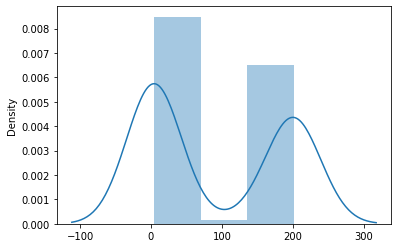

In [80]:
import seaborn as sns

sns.distplot(r)

/home/arjun/anaconda3/envs/rlenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

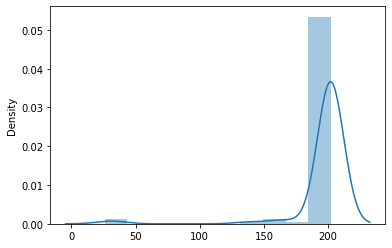

In [57]:
import seaborn as sns

sns.distplot(r)

/home/arjun/anaconda3/envs/rlenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

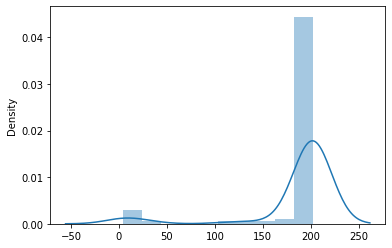

In [62]:

sns.distplot(r)

In [151]:
import sys
sys.path.append('../')

from pettingzoo.test import parallel_api_test
from src.environments import simple_pd_v0

env = dilemma_v0.env()
env = to_parallel(env)

parallel_api_test(env, num_cycles=1)


In [191]:
env = dilemma_v0.env('sd')

#env = ss.agent_indicator_v0(env)
rewards = []
env.reset()

In [227]:

obs, reward, done, info = env.last()
print(obs, reward, done, info)
rewards.append(reward)
act = model.predict(2)[0] if not done else None
env.step(1)
env.render()

1 1 False {}
Current state: Agent1: ANTI_SOCIAL , Agent2: ANTI_SOCIAL
{'player_0': 1, 'player_1': 1}



In [65]:
[0 for n in range(5)]

[0, 0, 0, 0, 0]

In [26]:
np.zeros((2,))

array([0., 0.])

In [72]:
import numpy as np

np.random.choice(2,  p=[0.5, 0.5])

1

In [35]:
np.log(1 - 0.1 - 0.9 - 0.1*0.9)

<ipython-input-35-b1cebb2cf1ce>:1: RuntimeWarning: invalid value encountered in log
  np.log(1 - 0.1 - 0.9 - 0.1*0.9)


nan

In [38]:
np.log(0.5)

-0.6931471805599453

In [40]:
1 - 0.1 - 0.9 + 0.1*0.9

0.09000000000000001

In [99]:
f = np.zeros(100)
np.insert(f, 2, 5)

array([0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [191]:
np.random.choice([0,1], p=[0.5,0.5])

1

In [ ]:
# if self.prob:
        #     print('action2', action)
        #     if action == 0:
        #         action = np.random.choice([0,1], p=[0,1])
        #         if action == 1: print('flipped')

In [ ]:
https://www.researchgate.net/publication/281064730_Competitive_Centipede_Games_Zero-End_Payoffs_and_Payoff_Inequality_Deter_Reciprocal_Cooperation